In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

Cloning into 'yolov5'...
remote: Enumerating objects: 12137, done.
remote: Counting objects: 100% (57/57), done.
remote: Compressing objects: 100% (49/49), done.
remote: Total 12137 (delta 32), reused 19 (delta 8), pack-reused 12080
Receiving objects: 100% (12137/12137), 11.92 MiB | 27.37 MiB/s, done.
Resolving deltas: 100% (8416/8416), done.
/content/yolov5
     |████████████████████████████████| 596 kB 5.0 MB/s 


In [ ]:
!curl -L "https://public.roboflow.ai/ds/WKkUorQ71T?key=wIBAdyawPa" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

In [ ]:
# download the dataset from this link
# https://drive.google.com/file/d/1Ef01mGQZGYz0C1eaE8EhnJbxvwFmq1xb/view?usp=sharing
!unzip /content/dice_dataset.zip -d /content

In [ ]:
!cat /content/yolov5/models/yolov5s.yaml

# YOLOv5 🚀 by Ultralytics, GPL-3.0 license

# Parameters
nc: 80  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]]

In [ ]:
# Train YOLOv5s on COCO128 for 3 epochs
!python train.py --img 416 --batch 20 --epochs 75 --data coco.yaml --cfg /content/yolov5/models/yolov5s.yaml --weights ''

train: weights=, cfg=/content/yolov5/models/yolov5s.yaml, data=coco.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=75, batch_size=20, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-227-ga6e99e4 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0

In [ ]:
!python detect.py --weights runs/train/exp2/weights/best.pt --img 416 --conf 0.1 --source /content/dice_dataset/test

detect: weights=['runs/train/exp2/weights/best.pt'], source=/content/dice_dataset/test, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-227-ga6e99e4 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7026307 parameters, 0 gradients, 15.8 GFLOPs
image 1/15 /content/dice_dataset/test/IMG_20191209_100614.jpg: 416x416 2 1s, 2 2s, 3 3s, 3 4s, 3 5s, 3 6s, Done. (0.011s)
image 2/15 /content/dice_dataset/test/IMG_20191209_100620.jpg: 416x416 4 1s, 4 2s, 3 3s, 4 4s, 4 5s, 4 6s, Done. (0.011s)
image 3/15 /content/dice_dataset/test/IMG_20191209_100625.jpg: 416x416 4 1s, 3 2s, 4 3s, 1 4, 4 5s, 4 6s, D

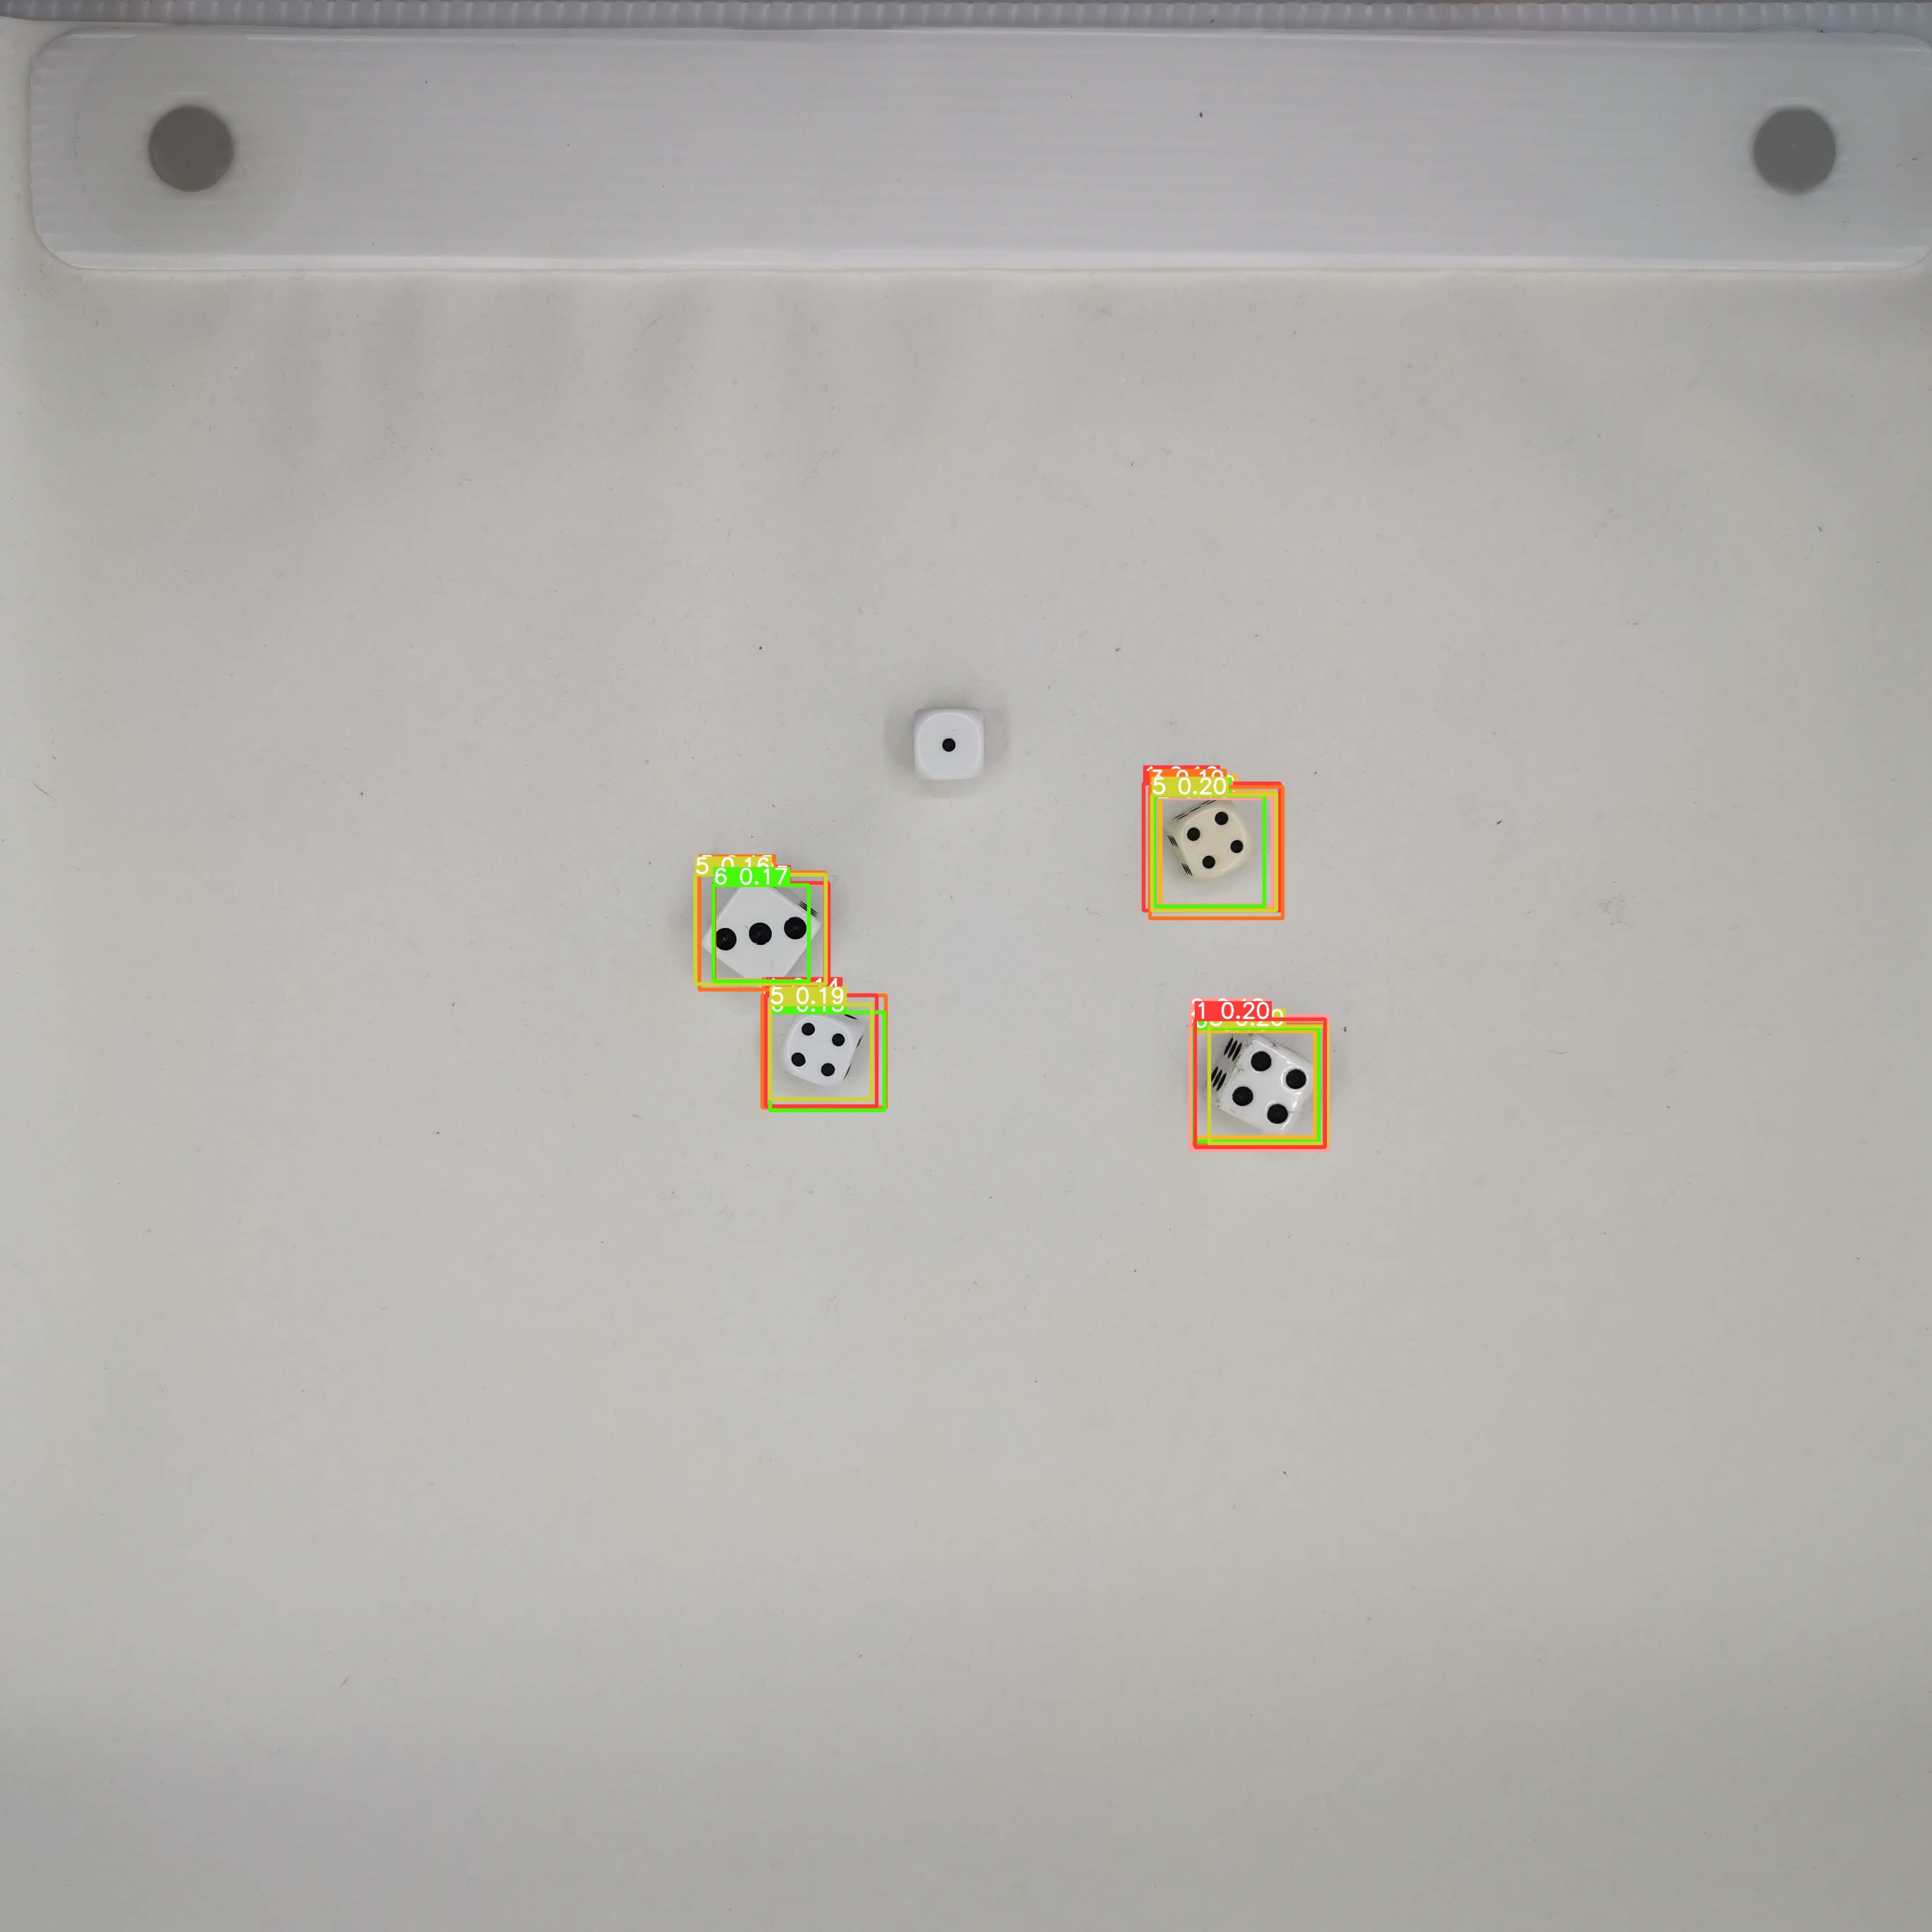

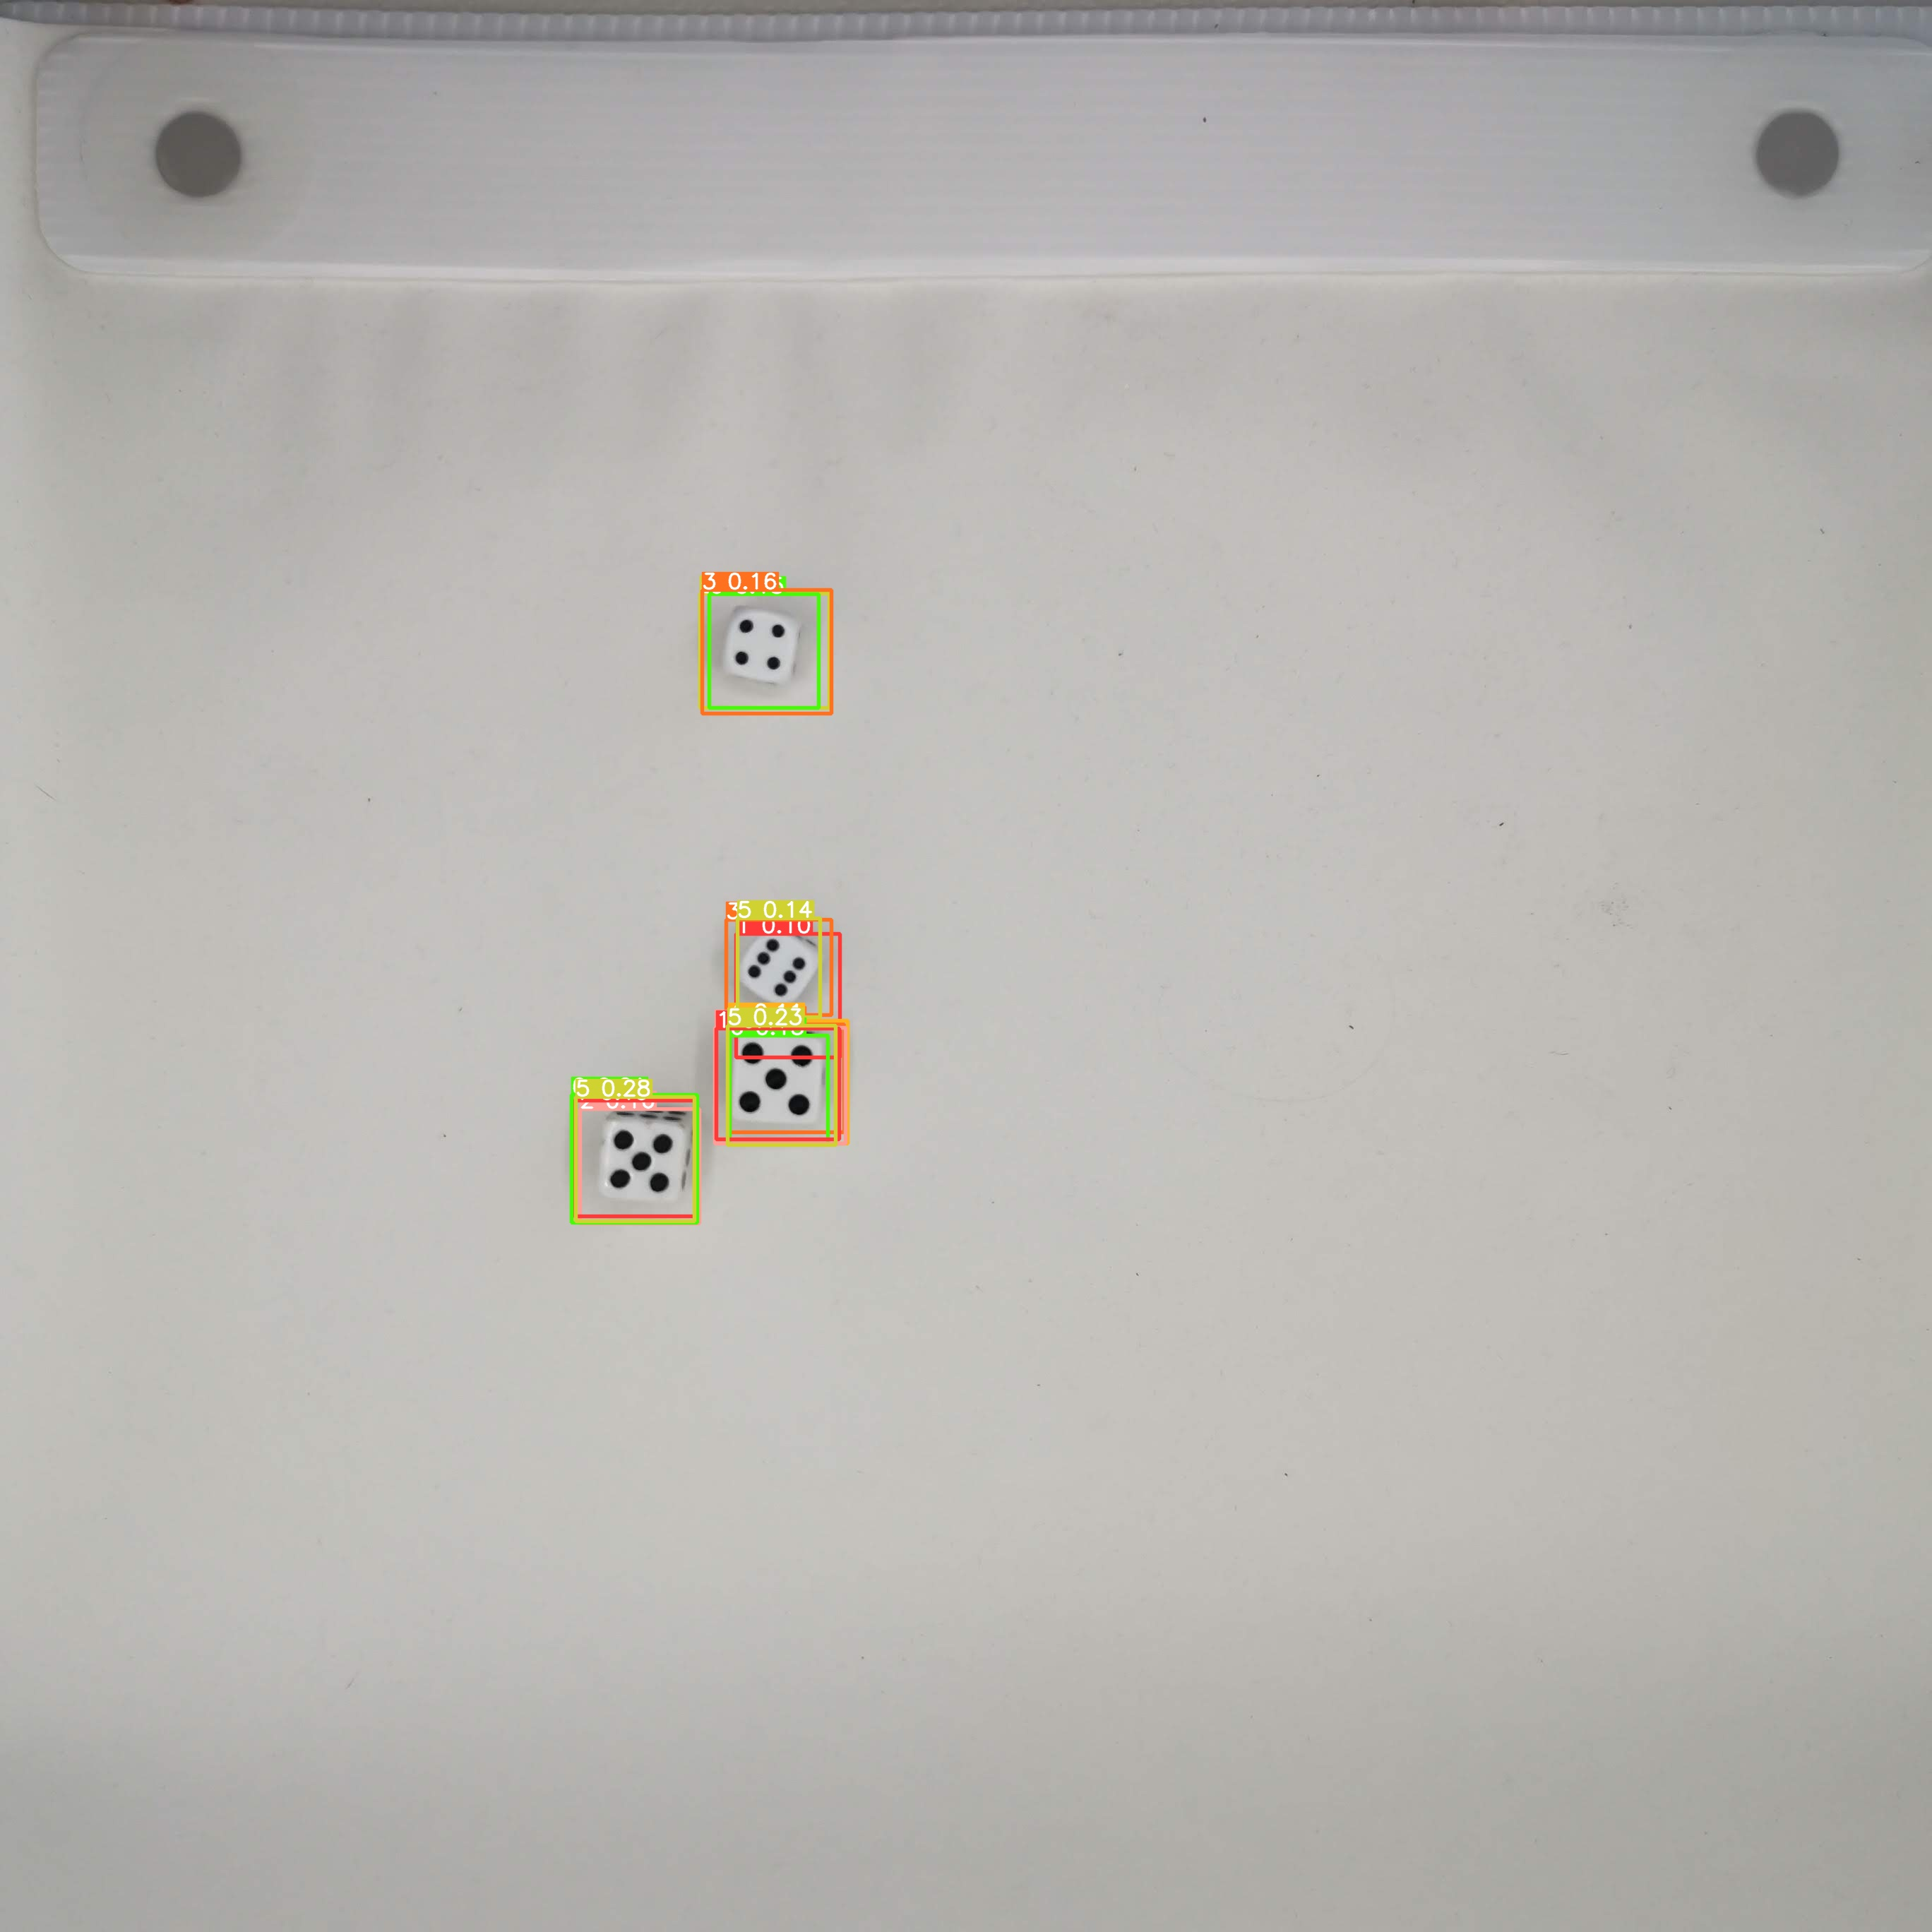

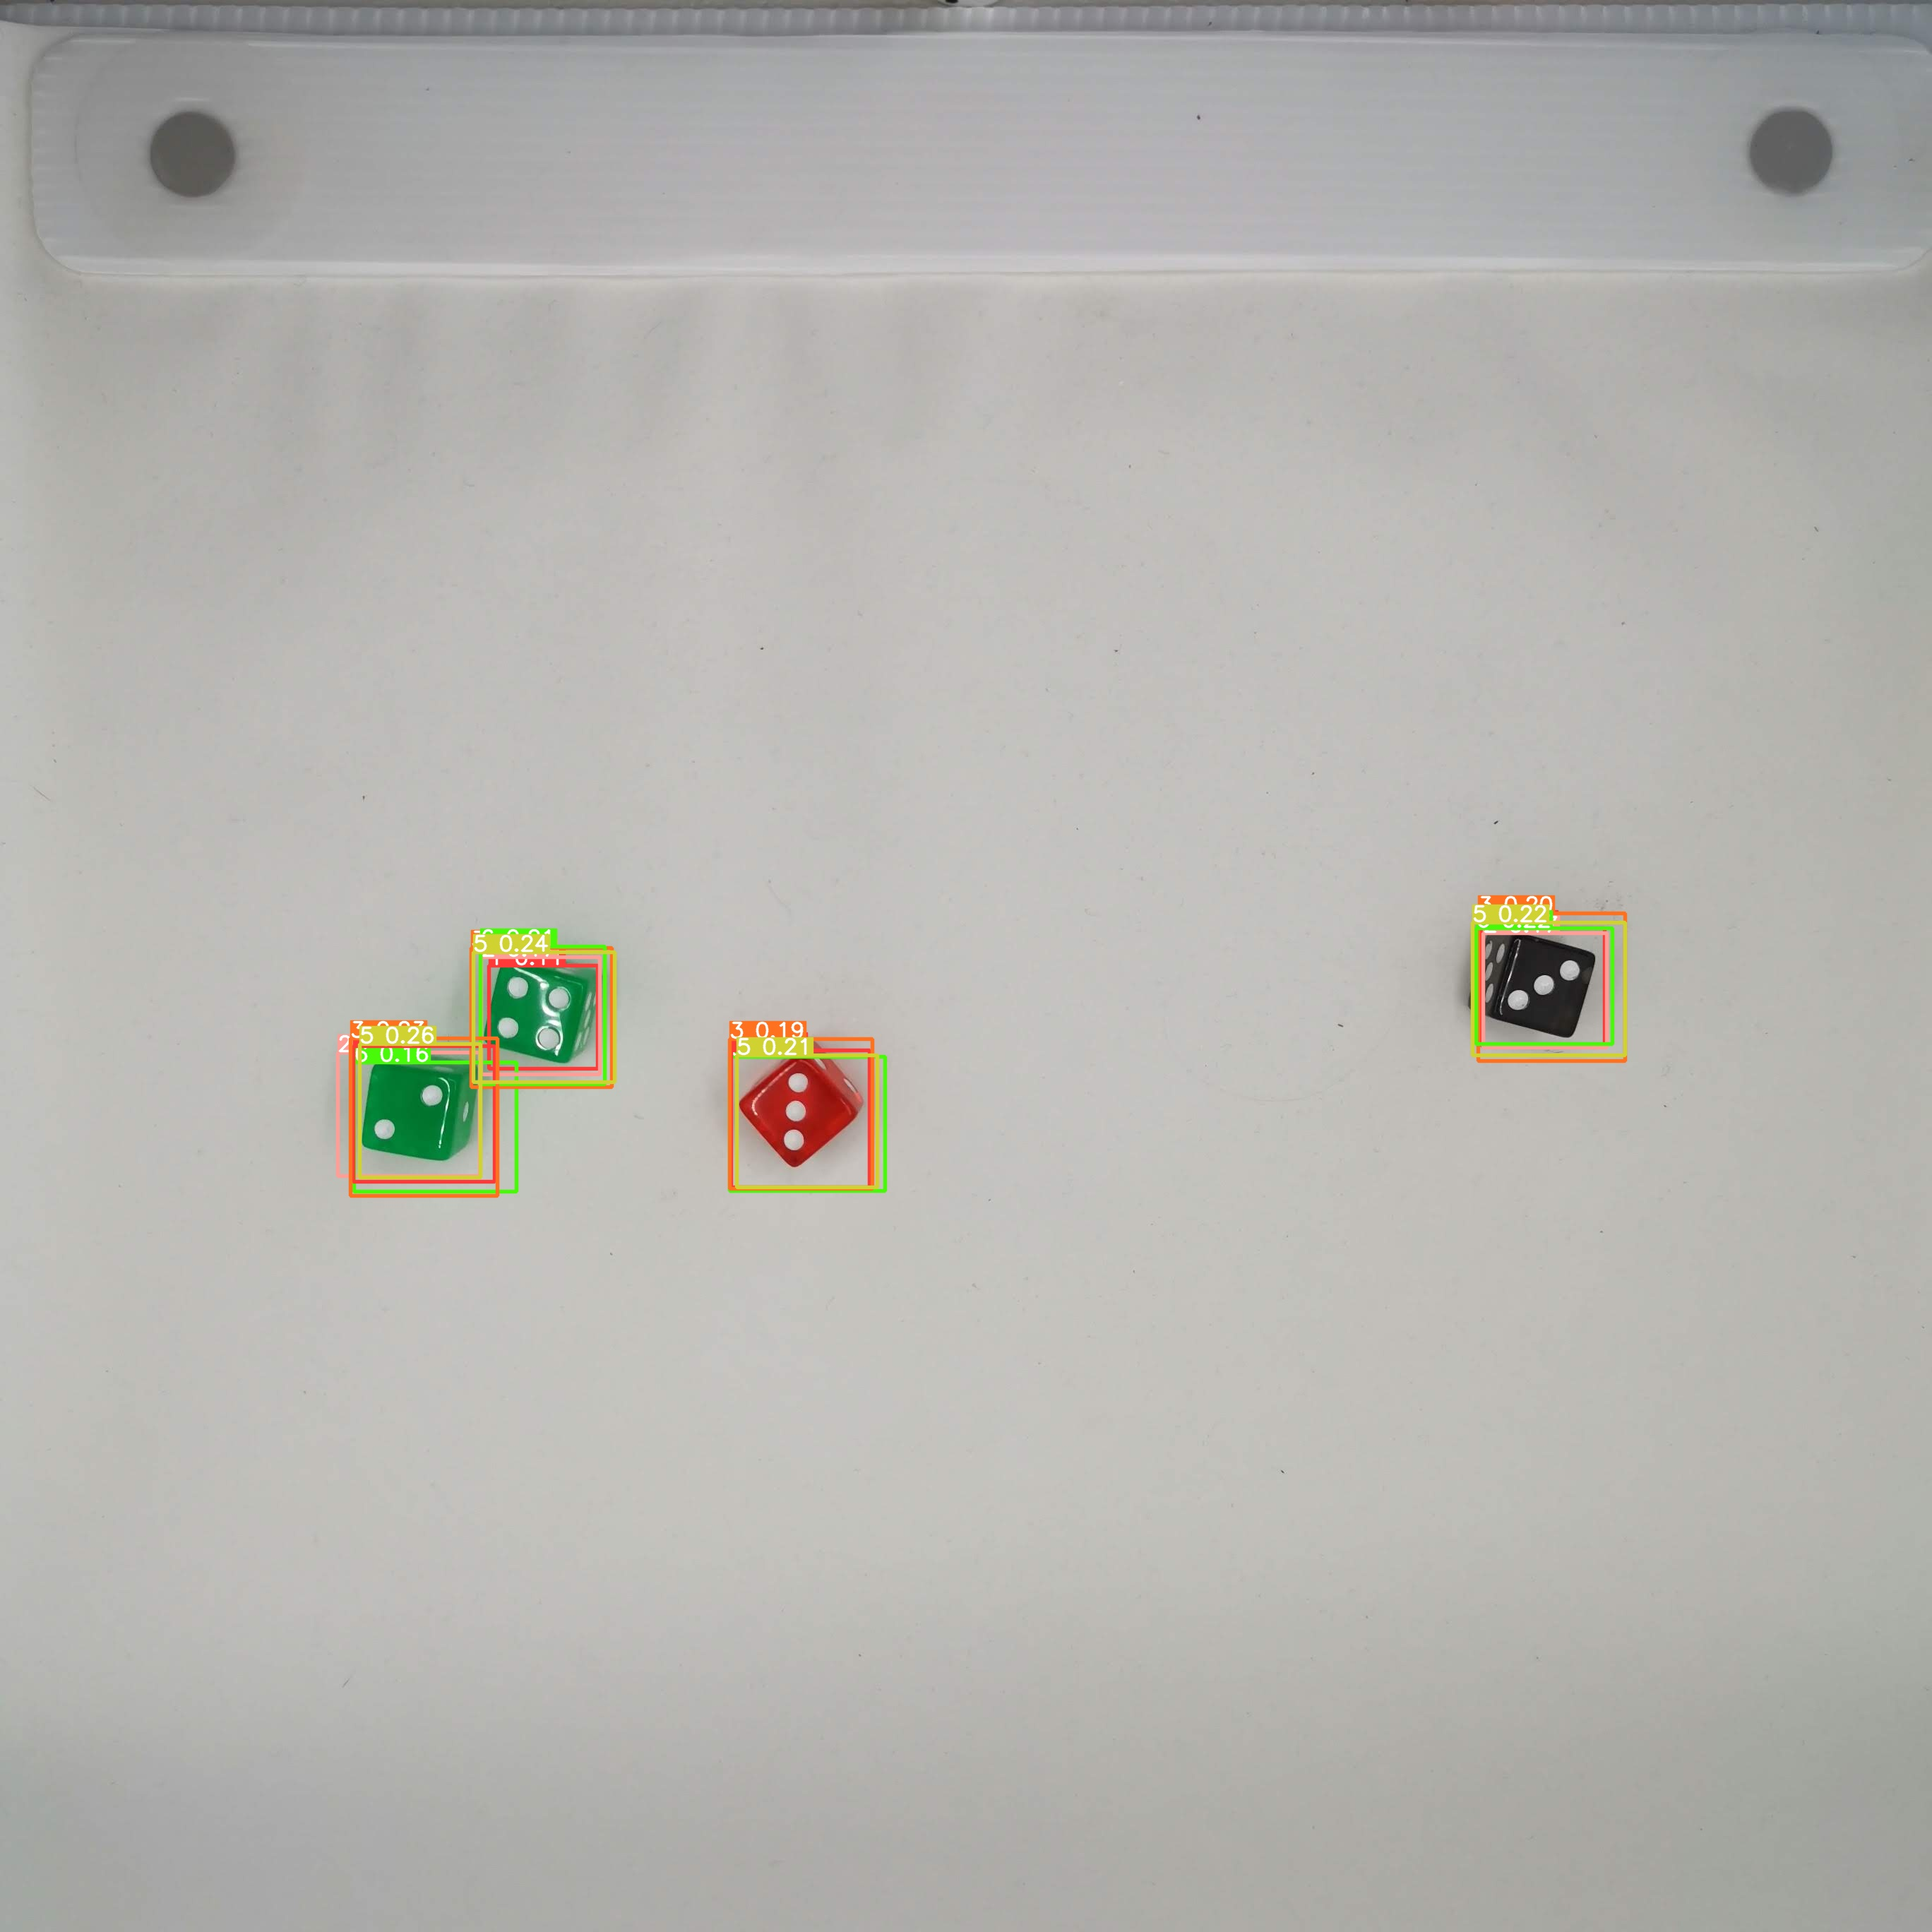

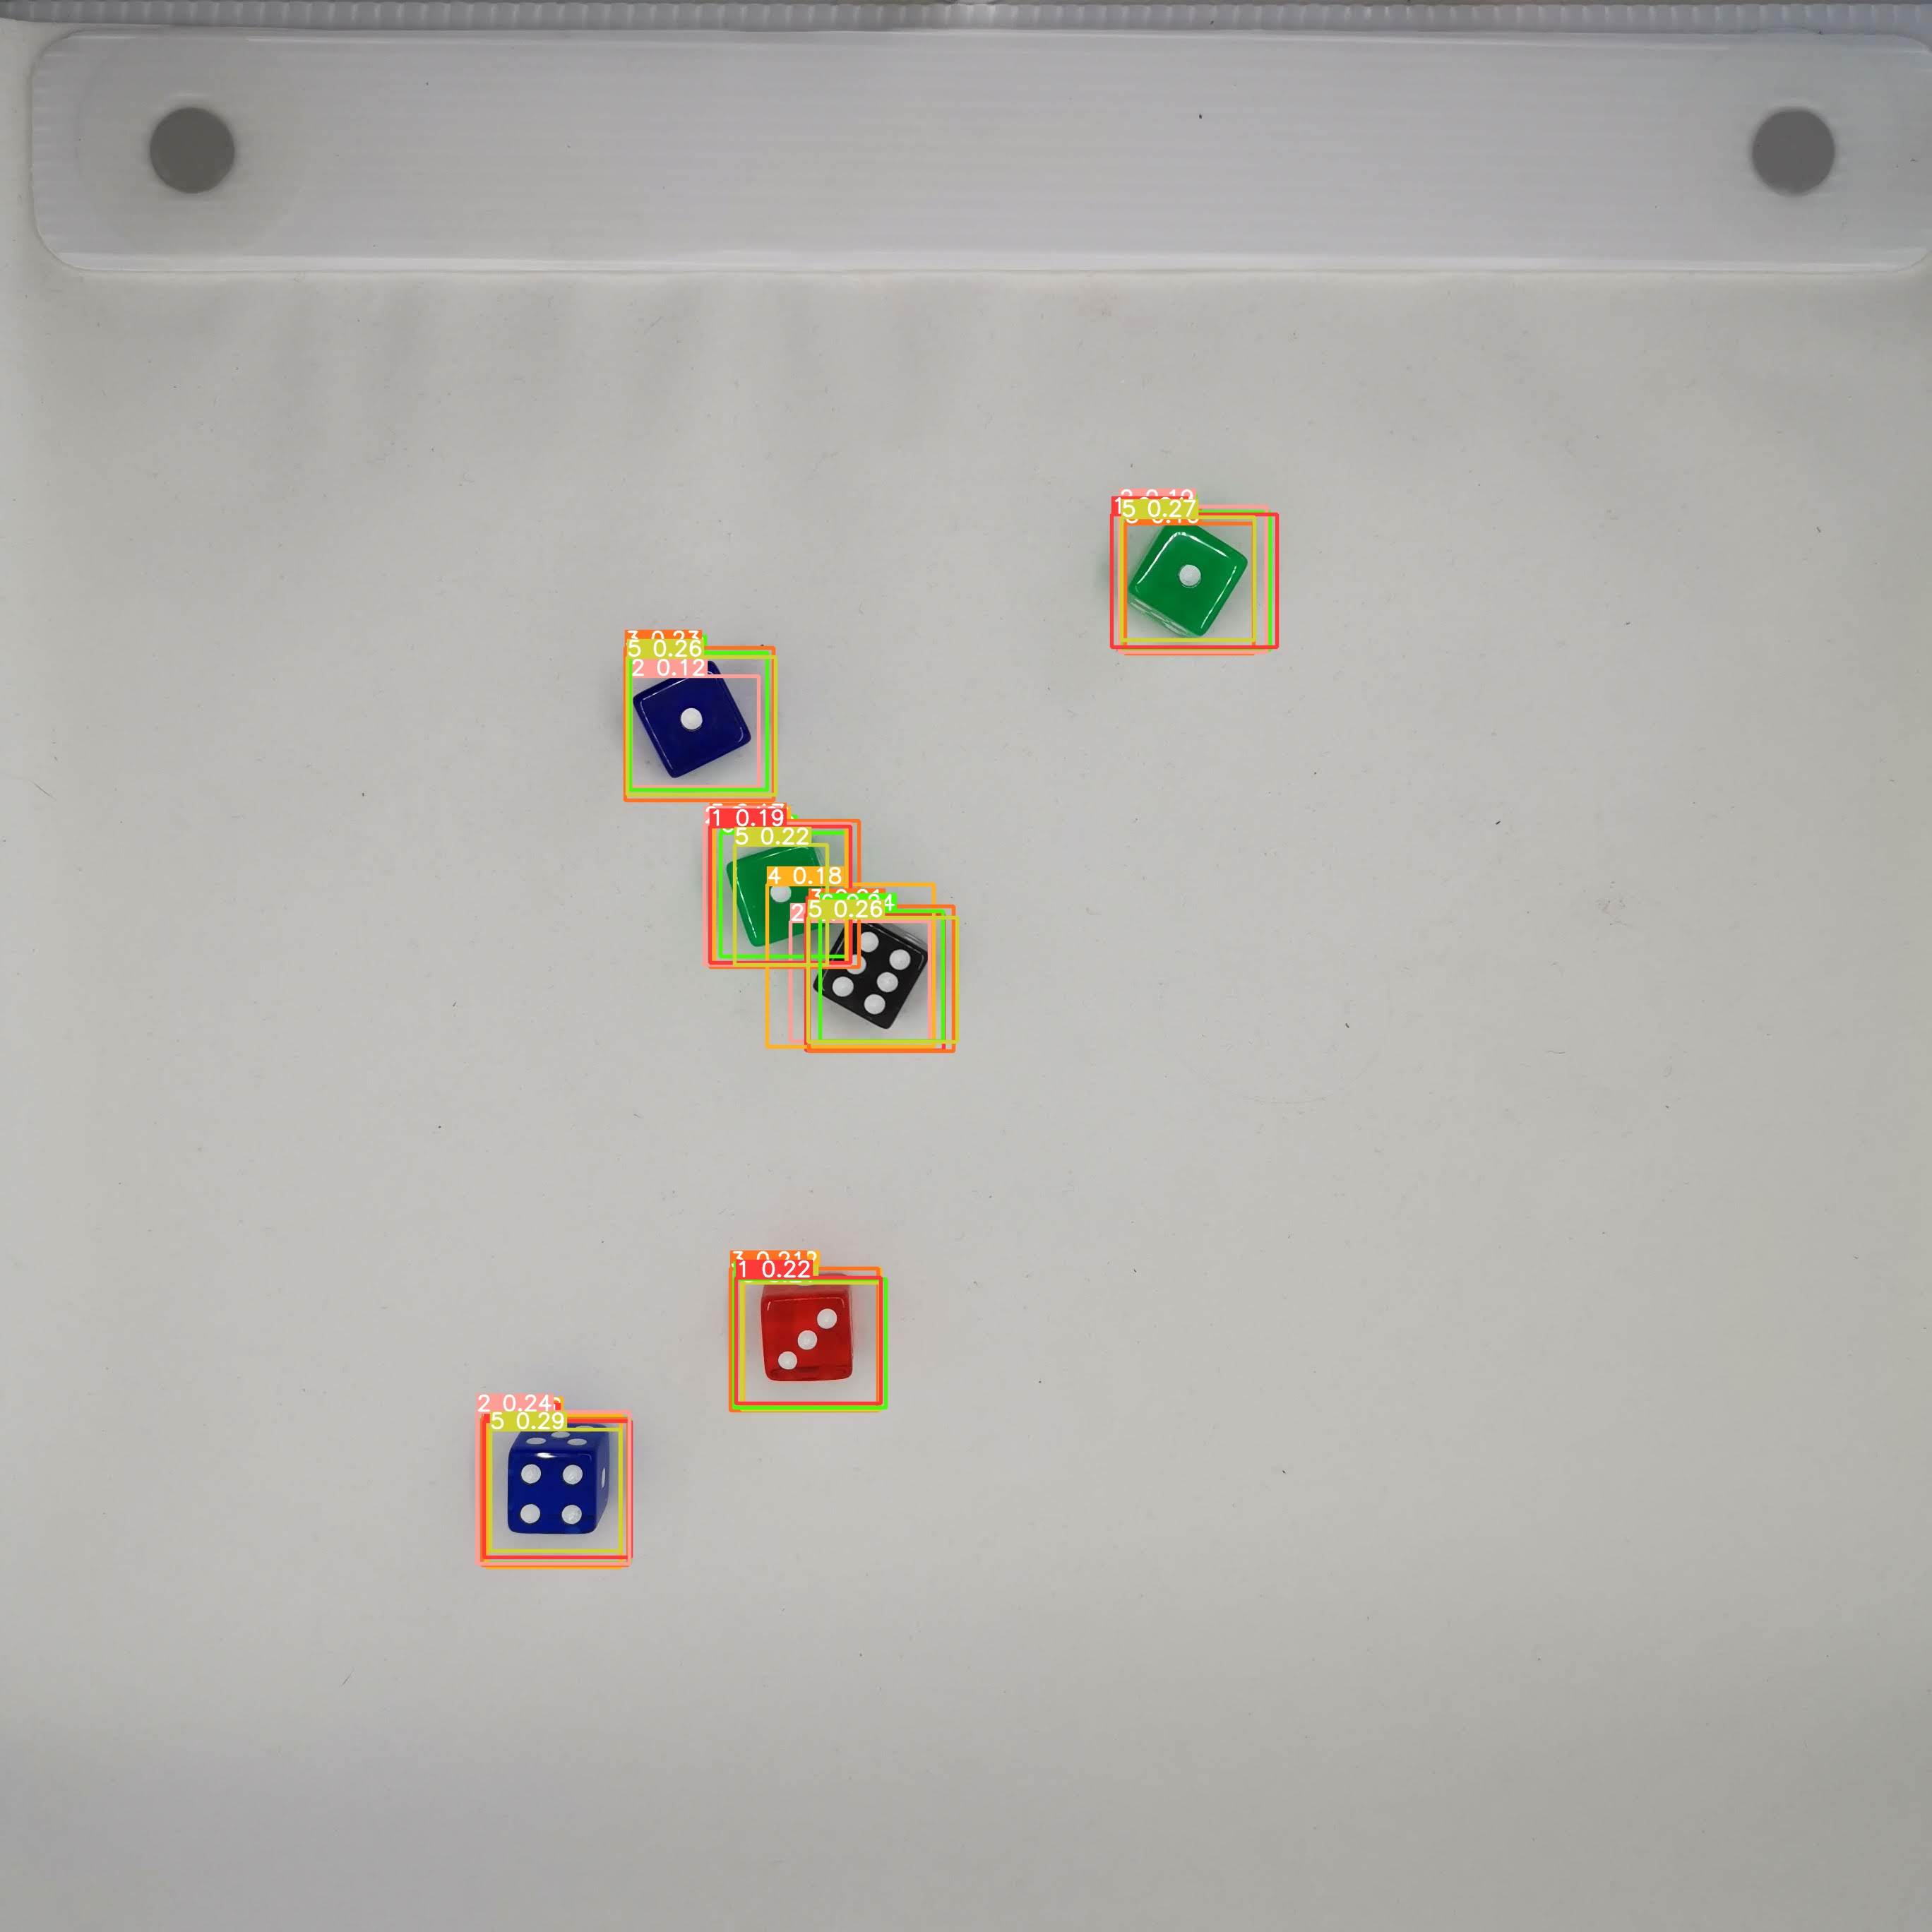

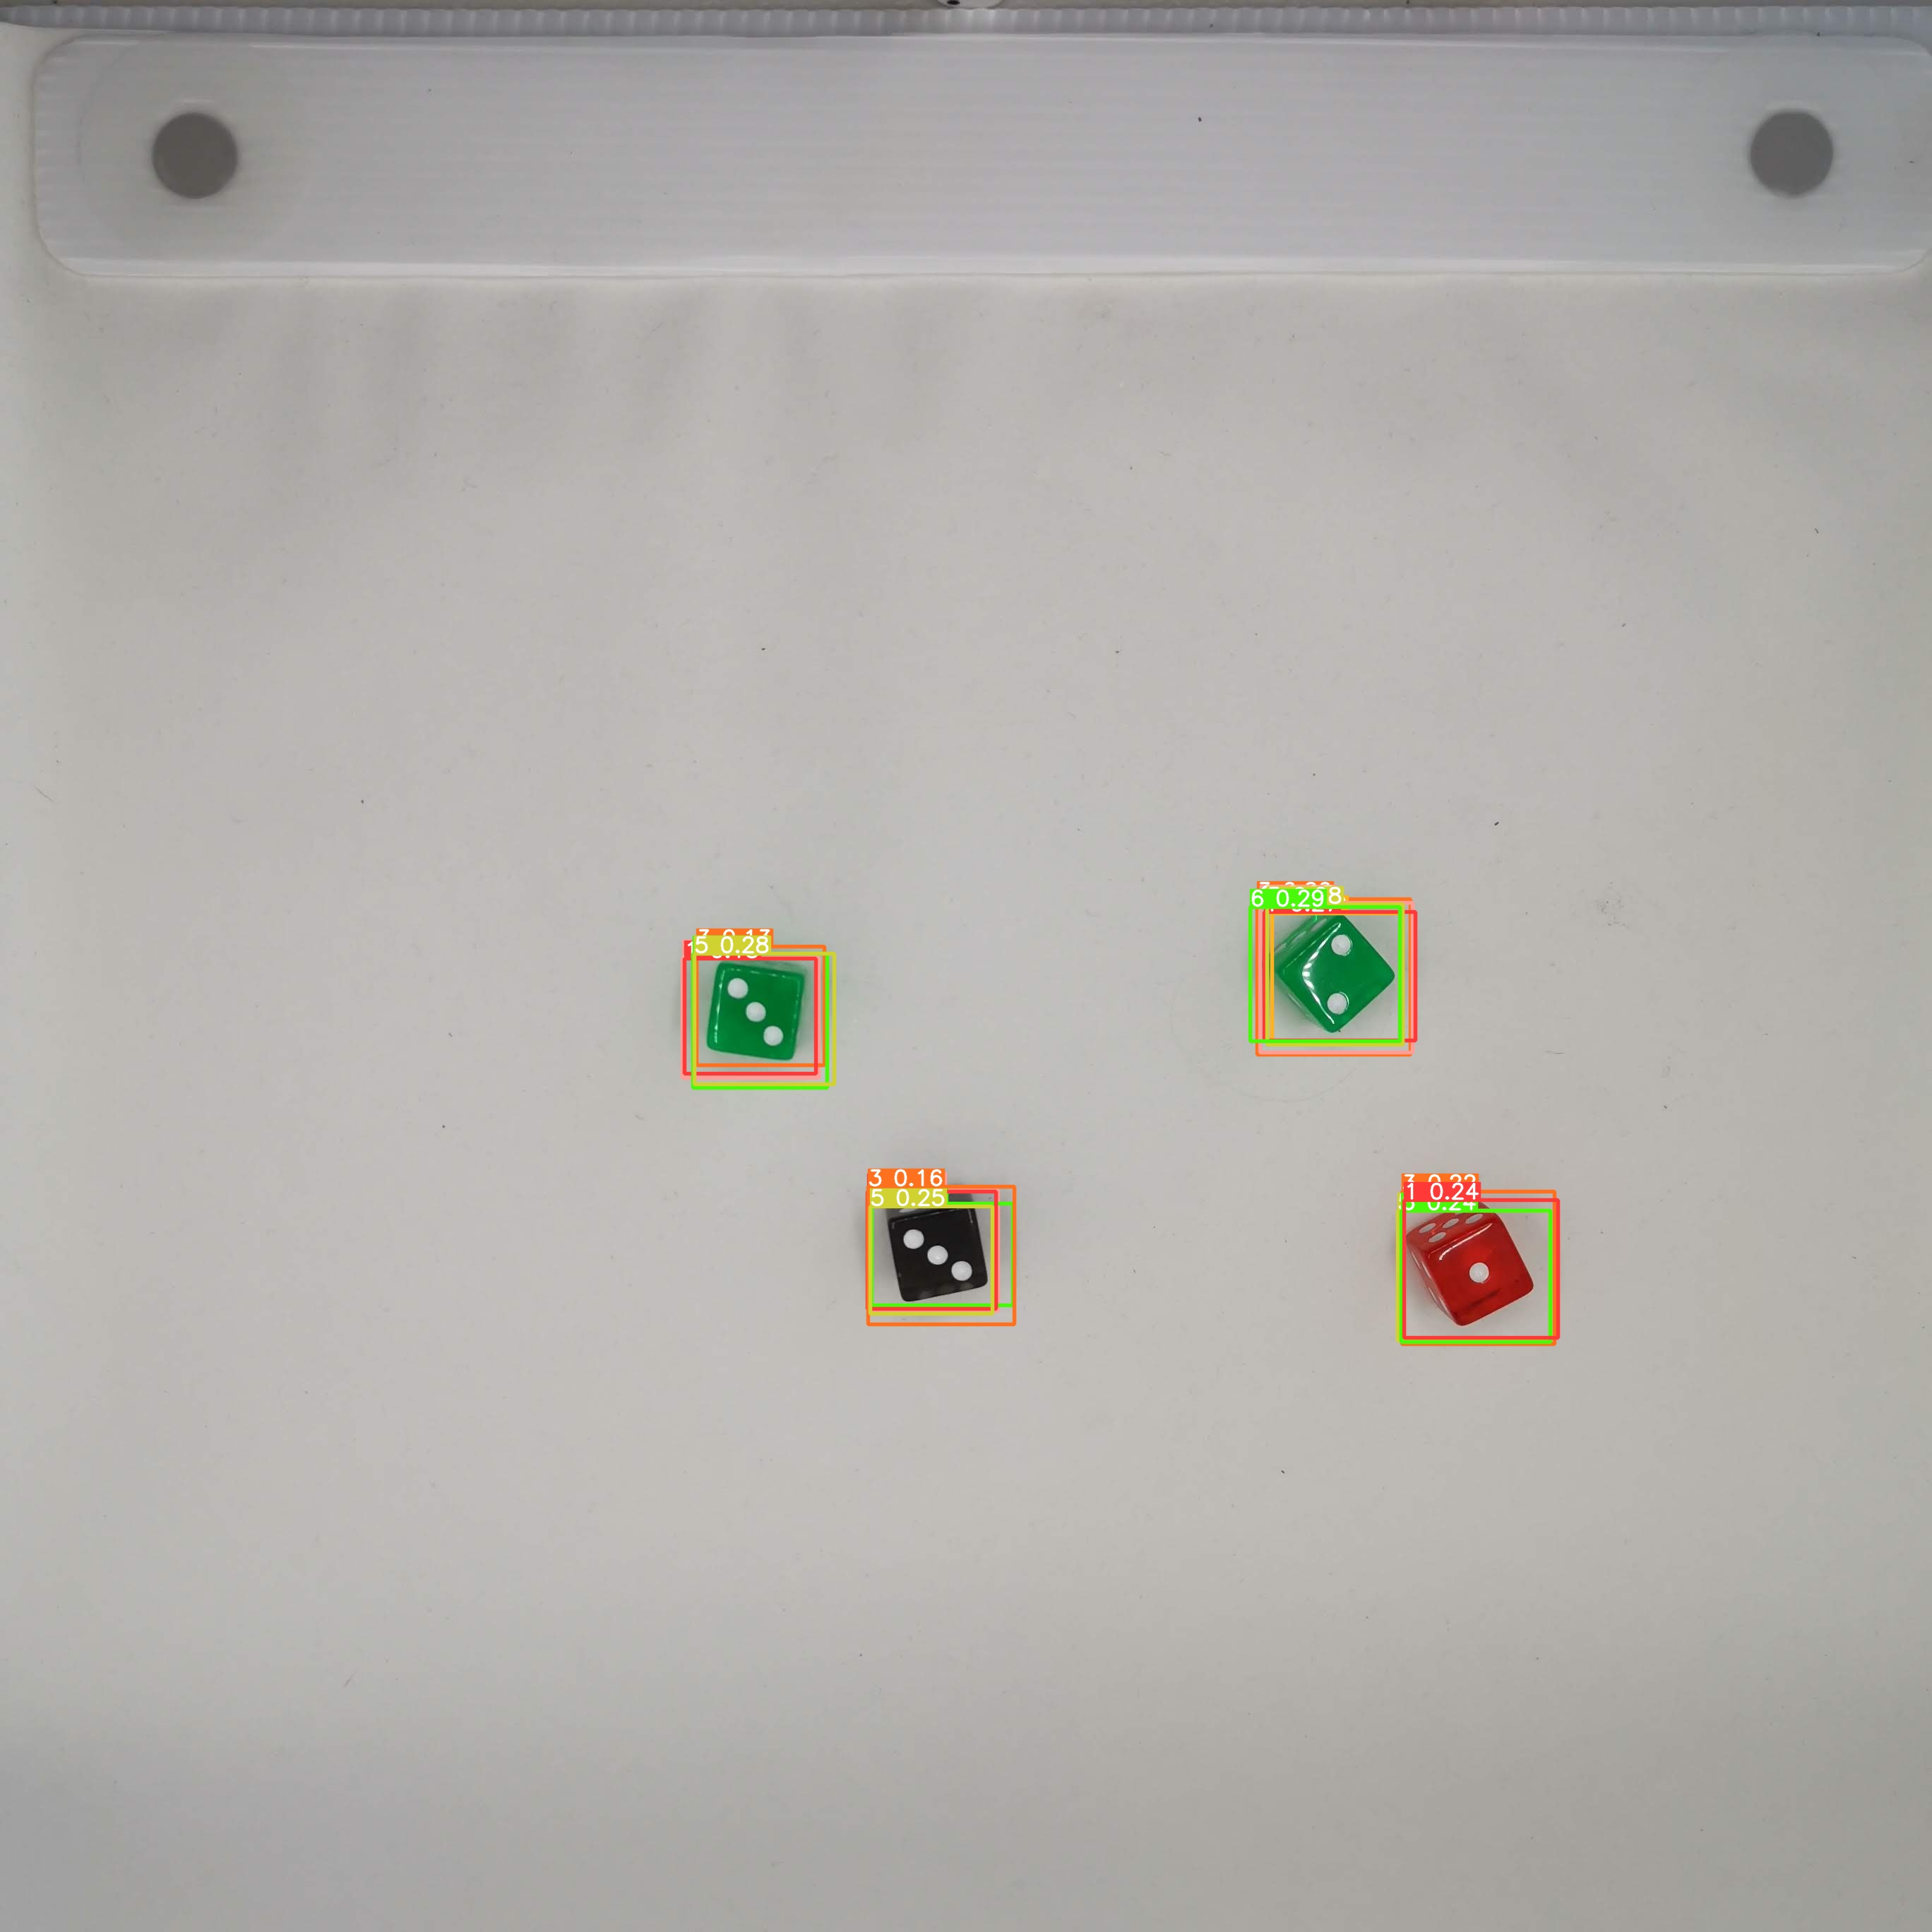

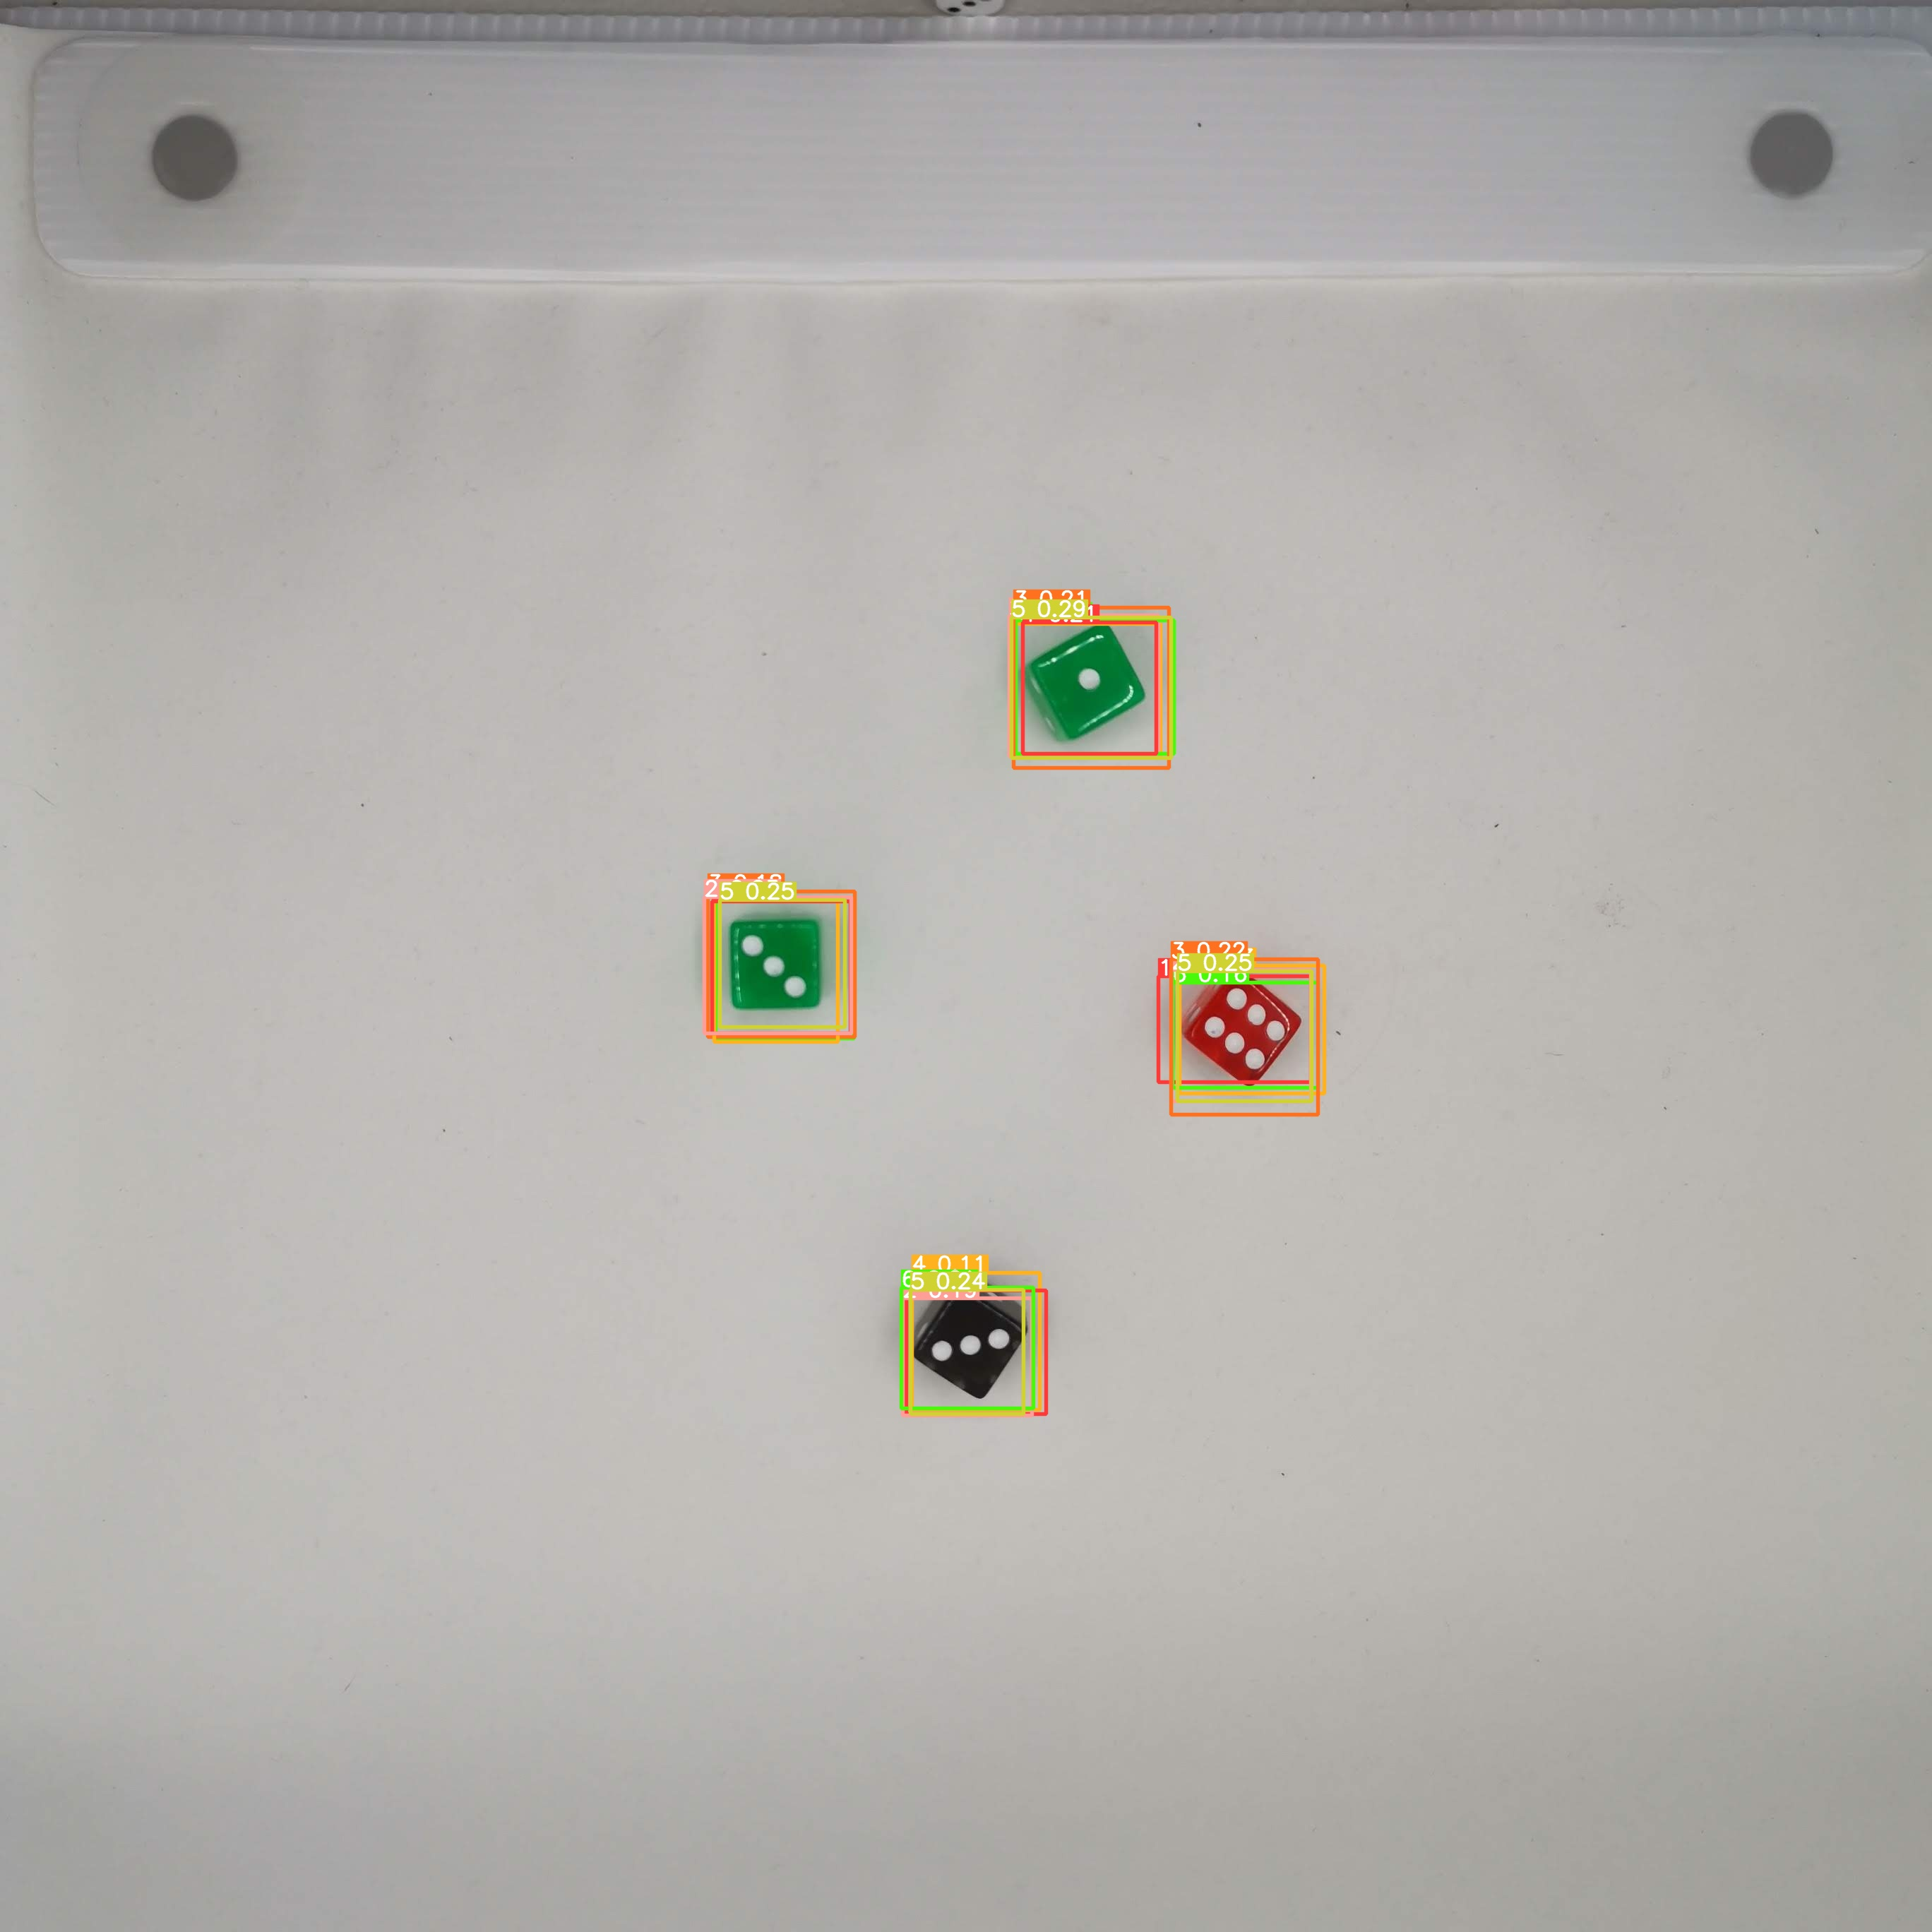

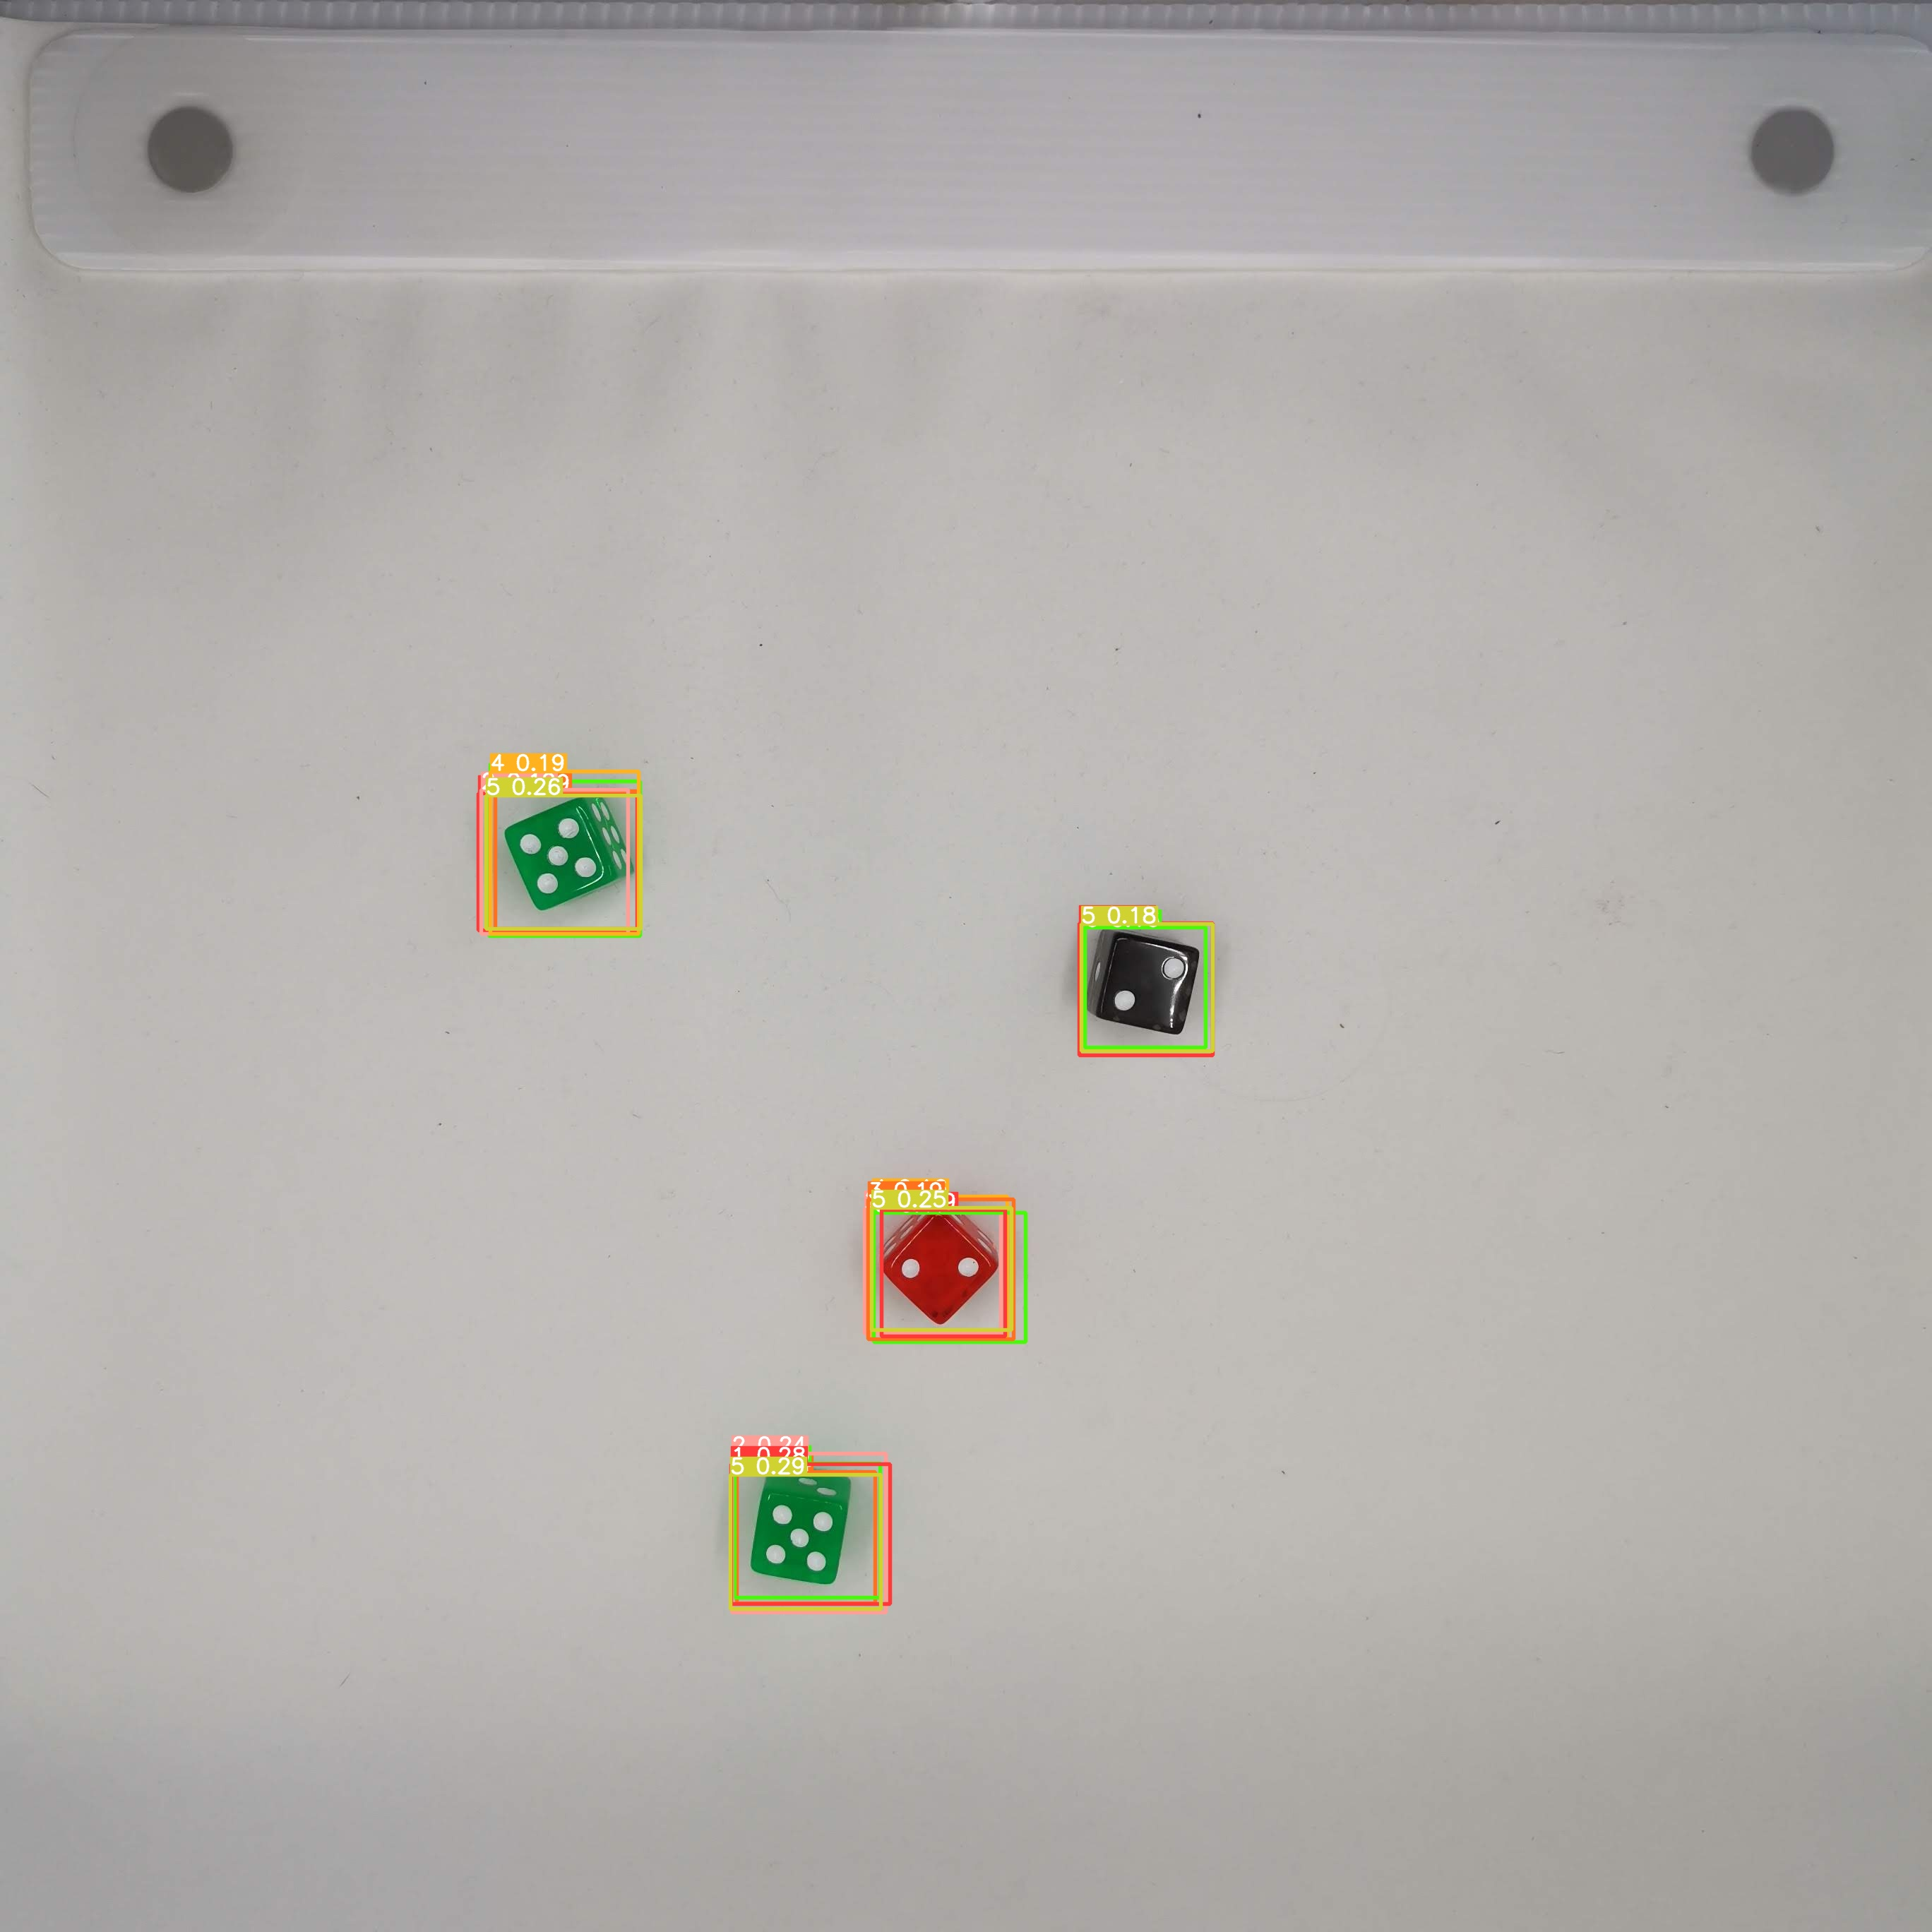

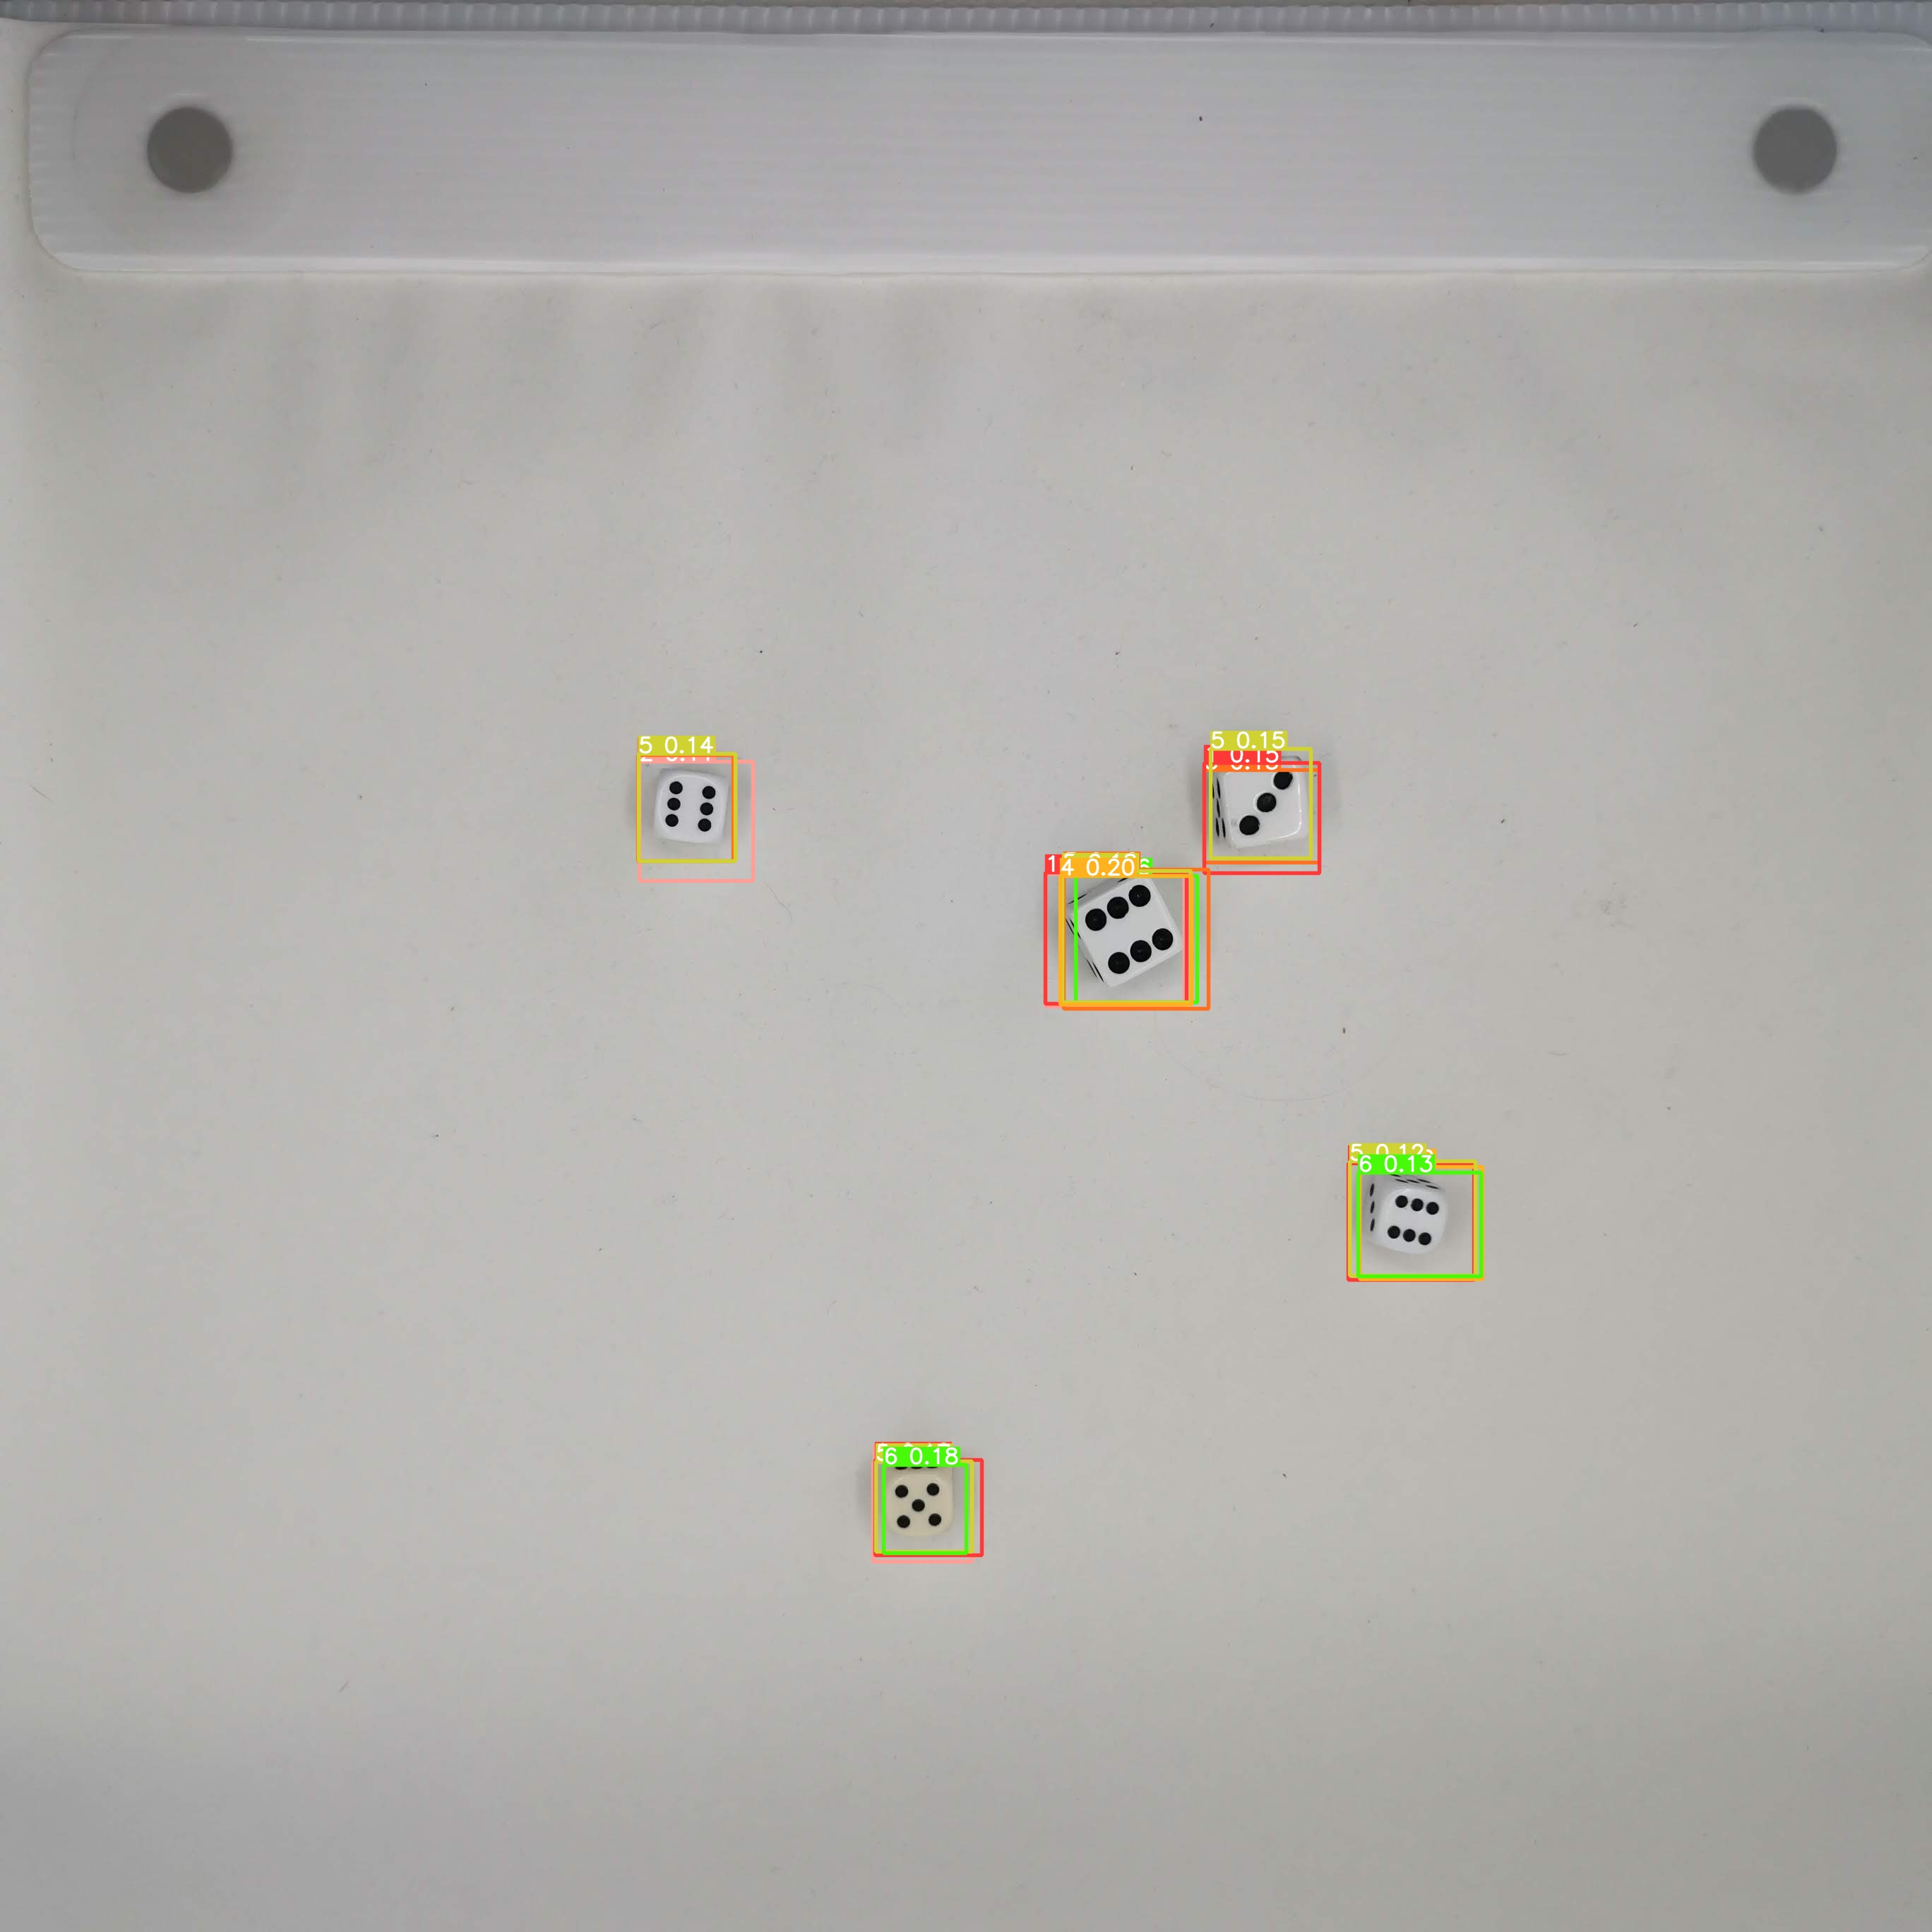

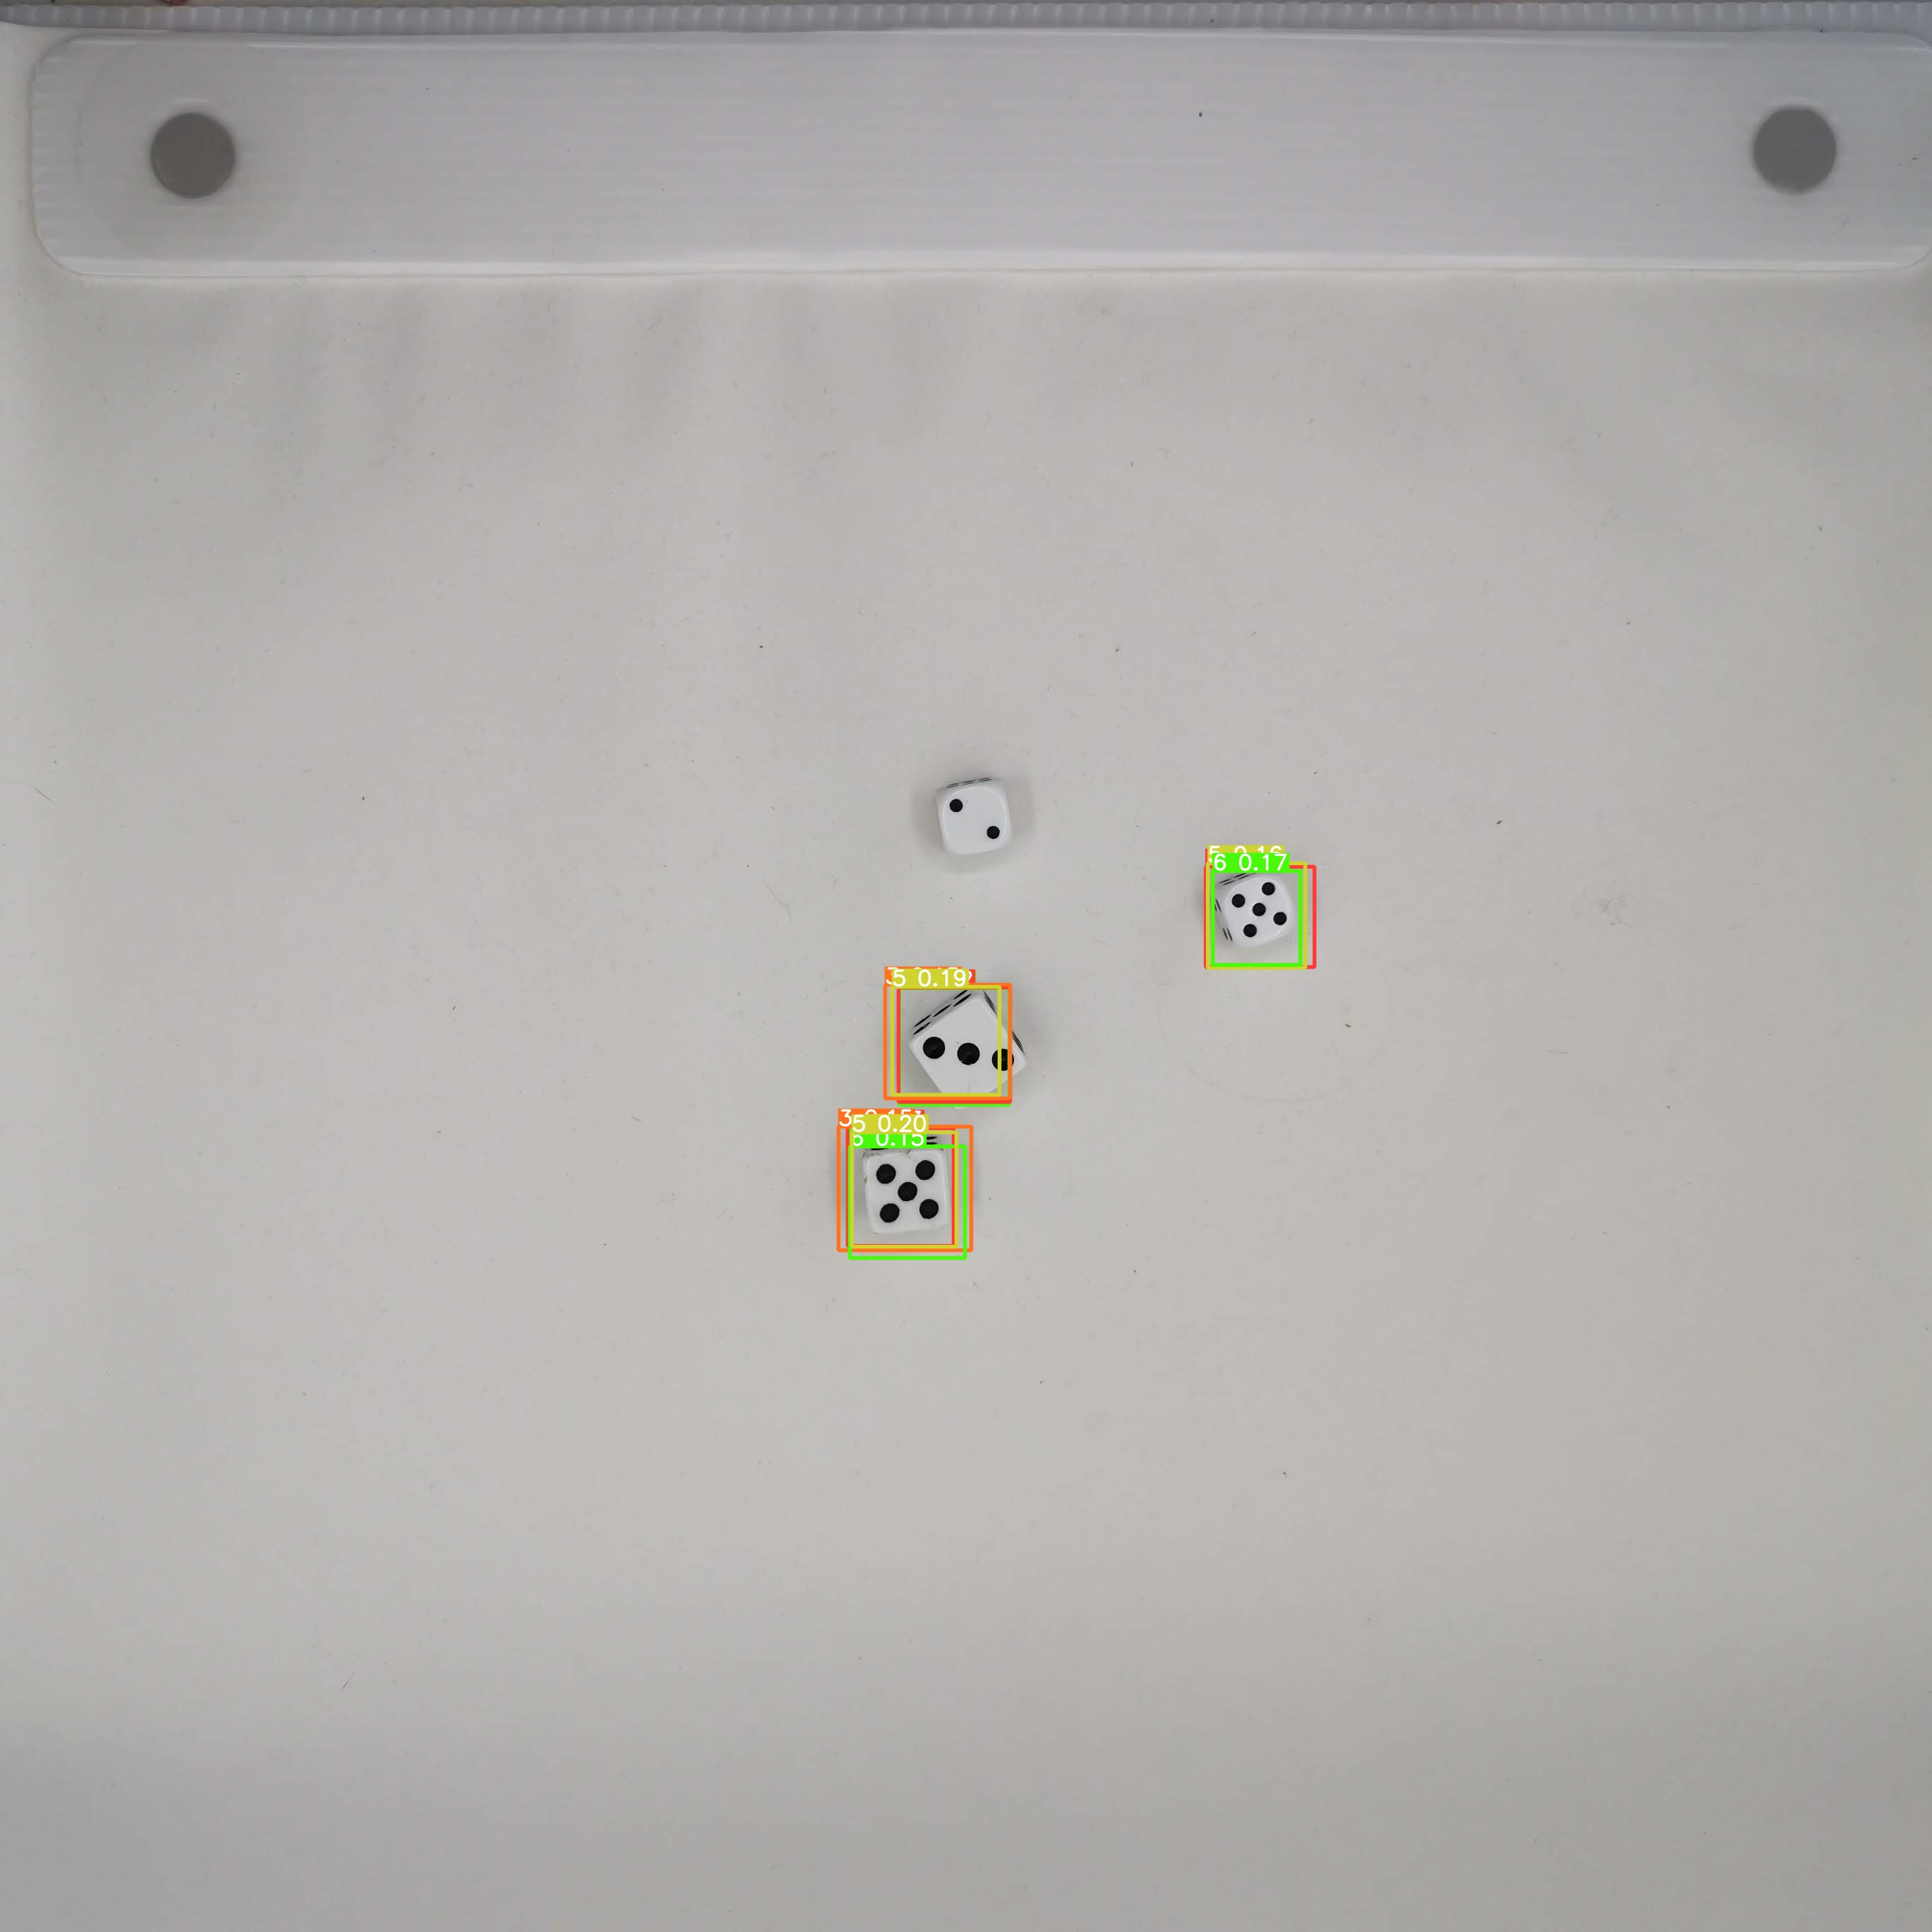

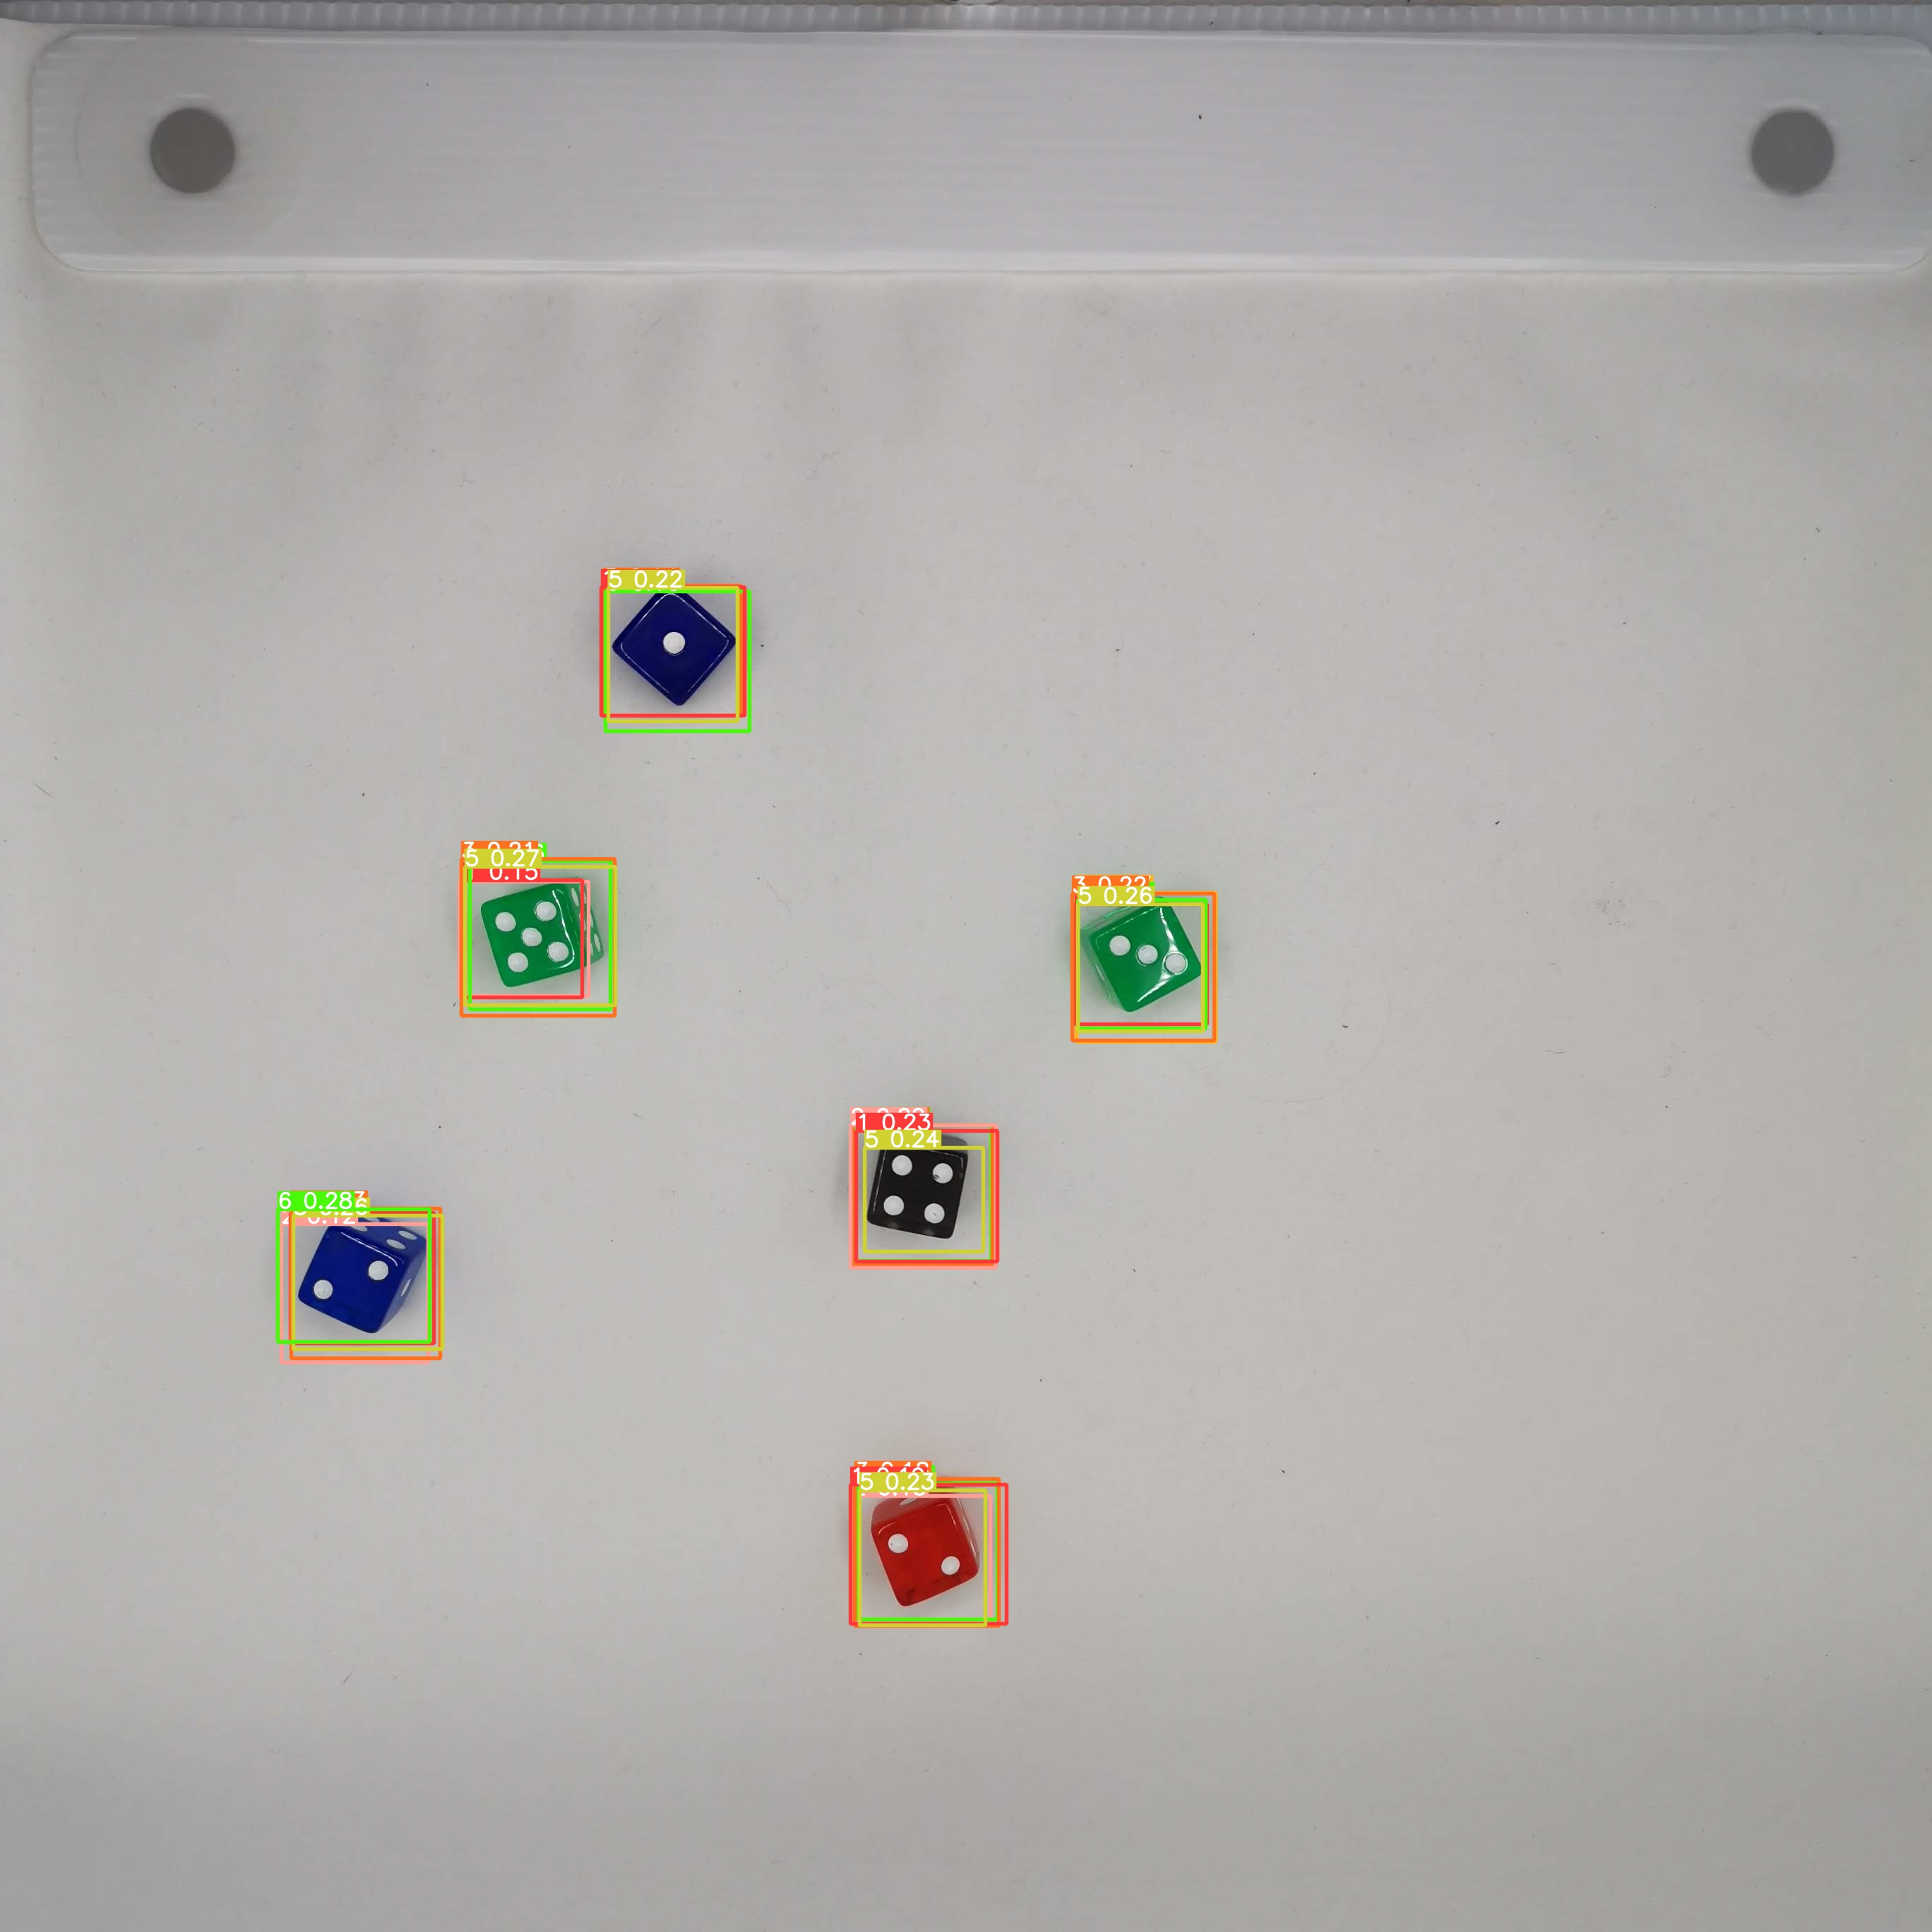

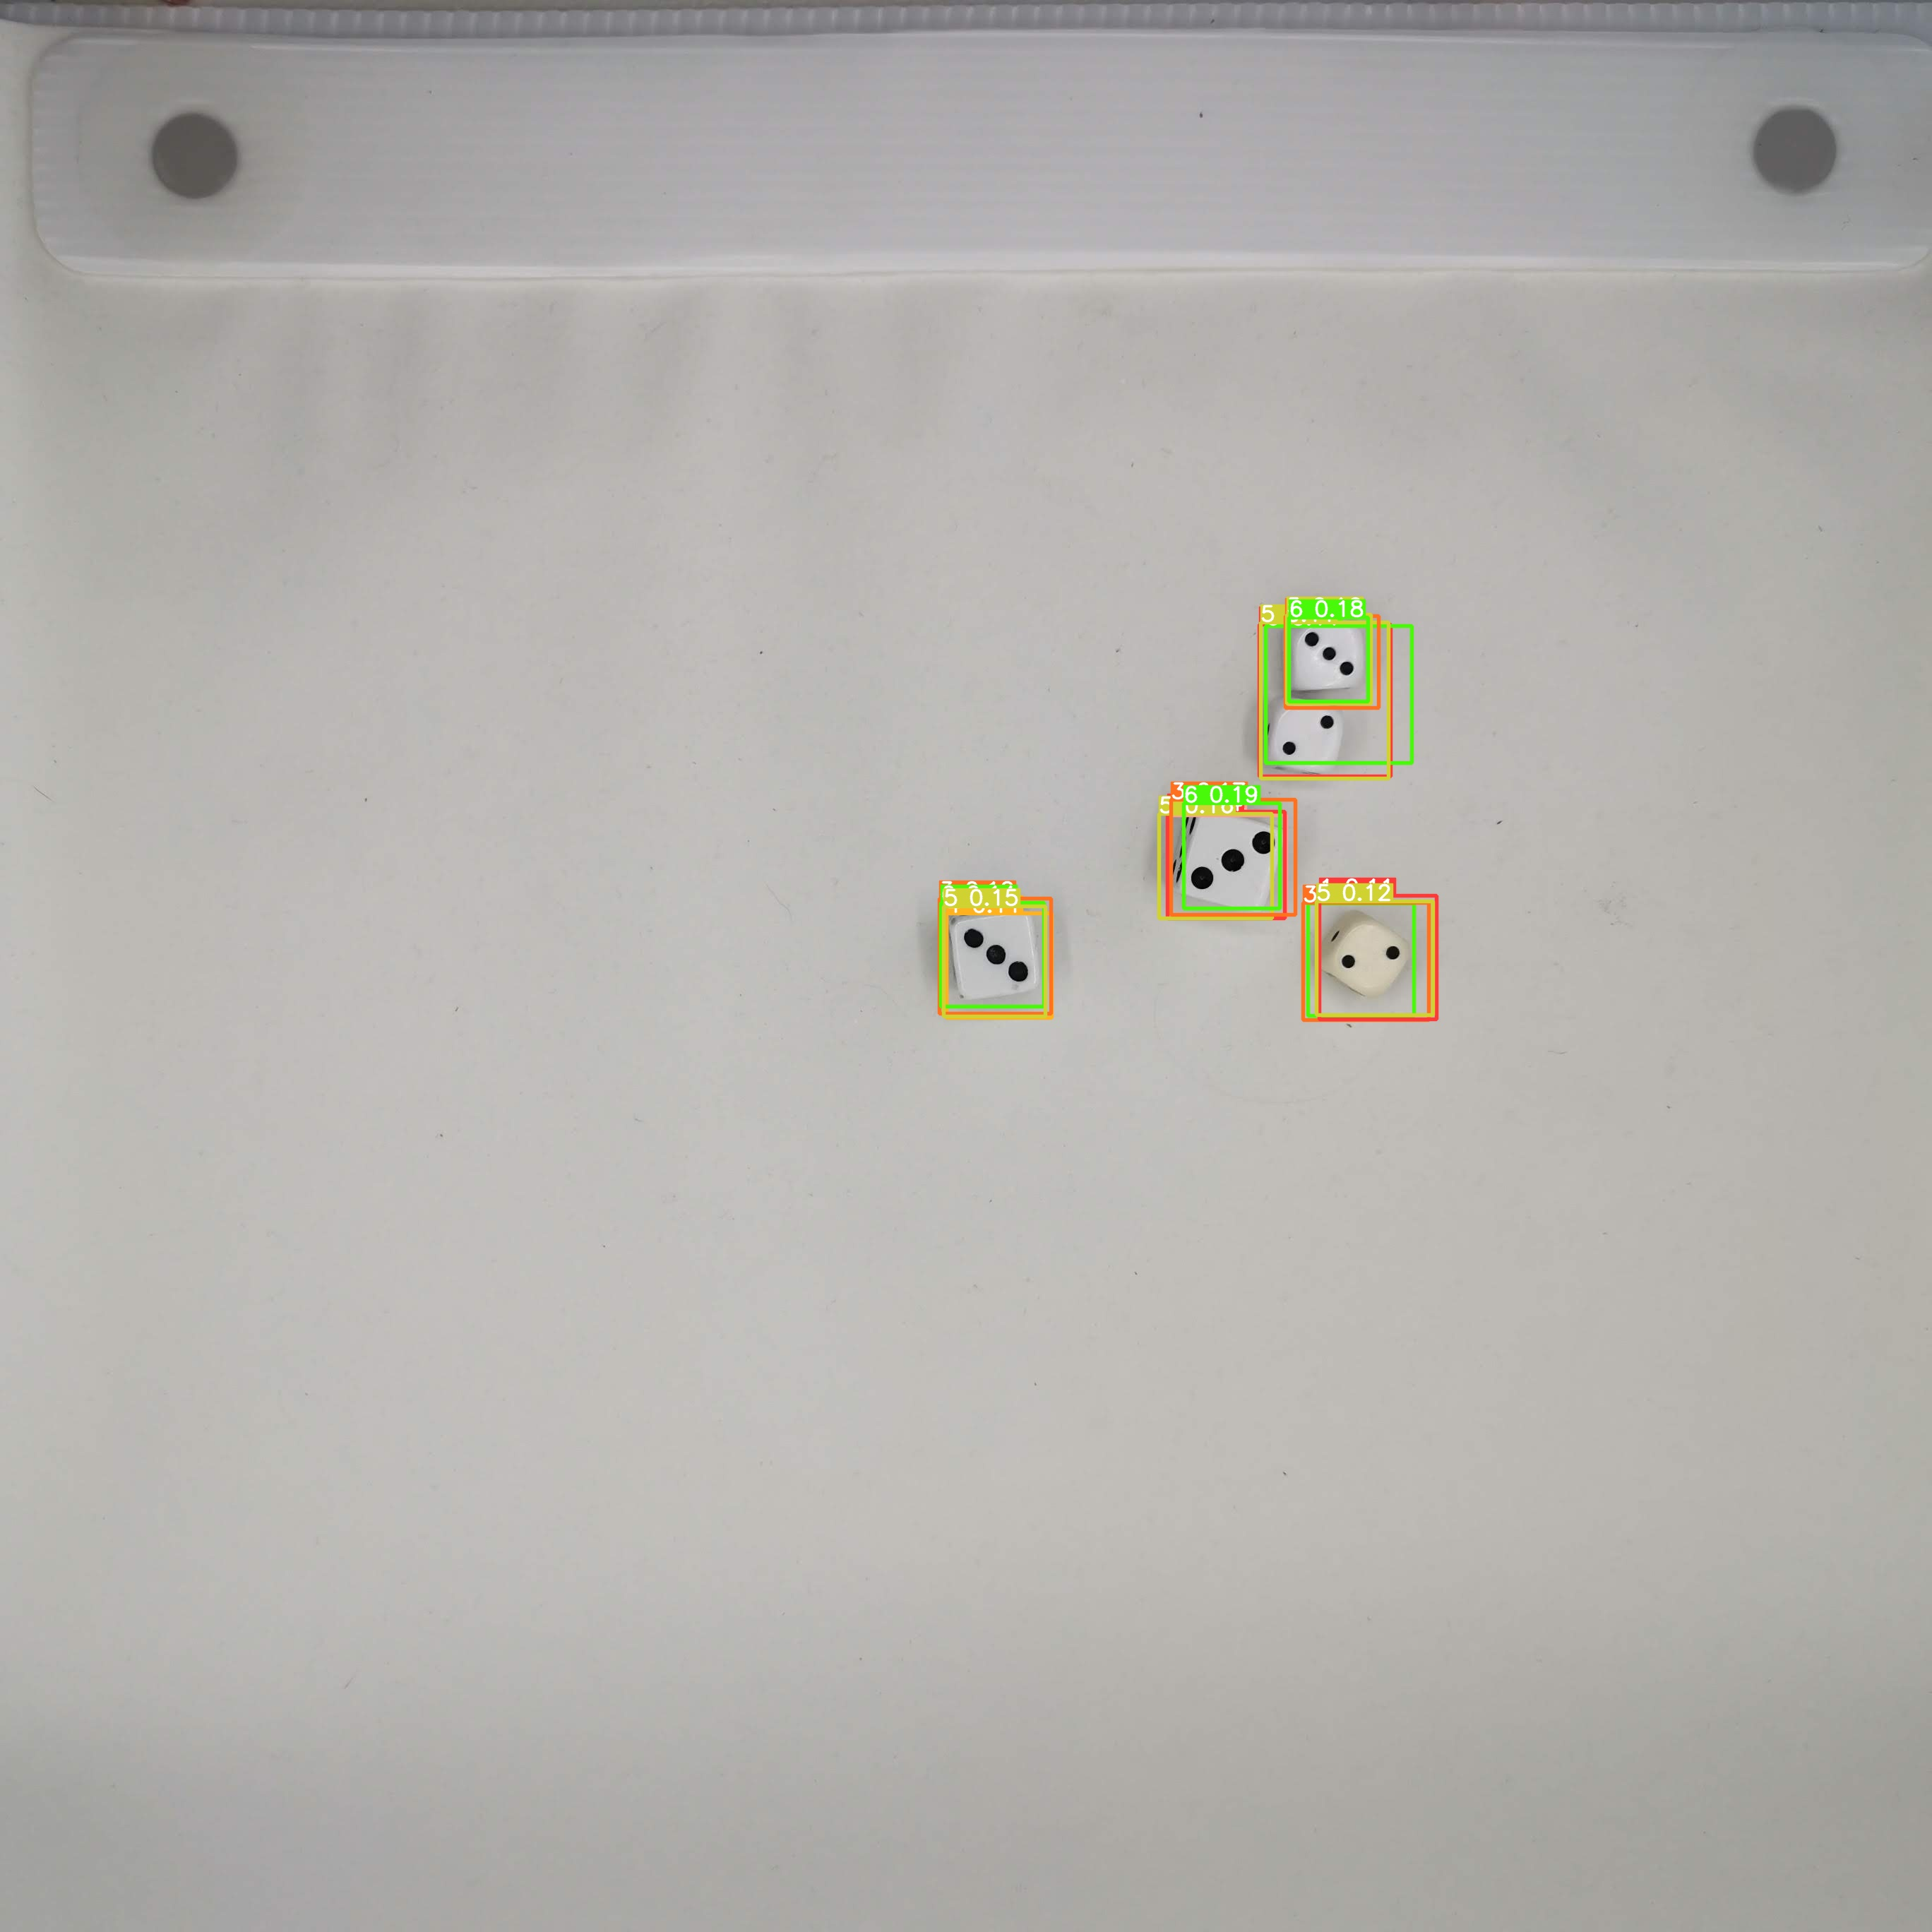

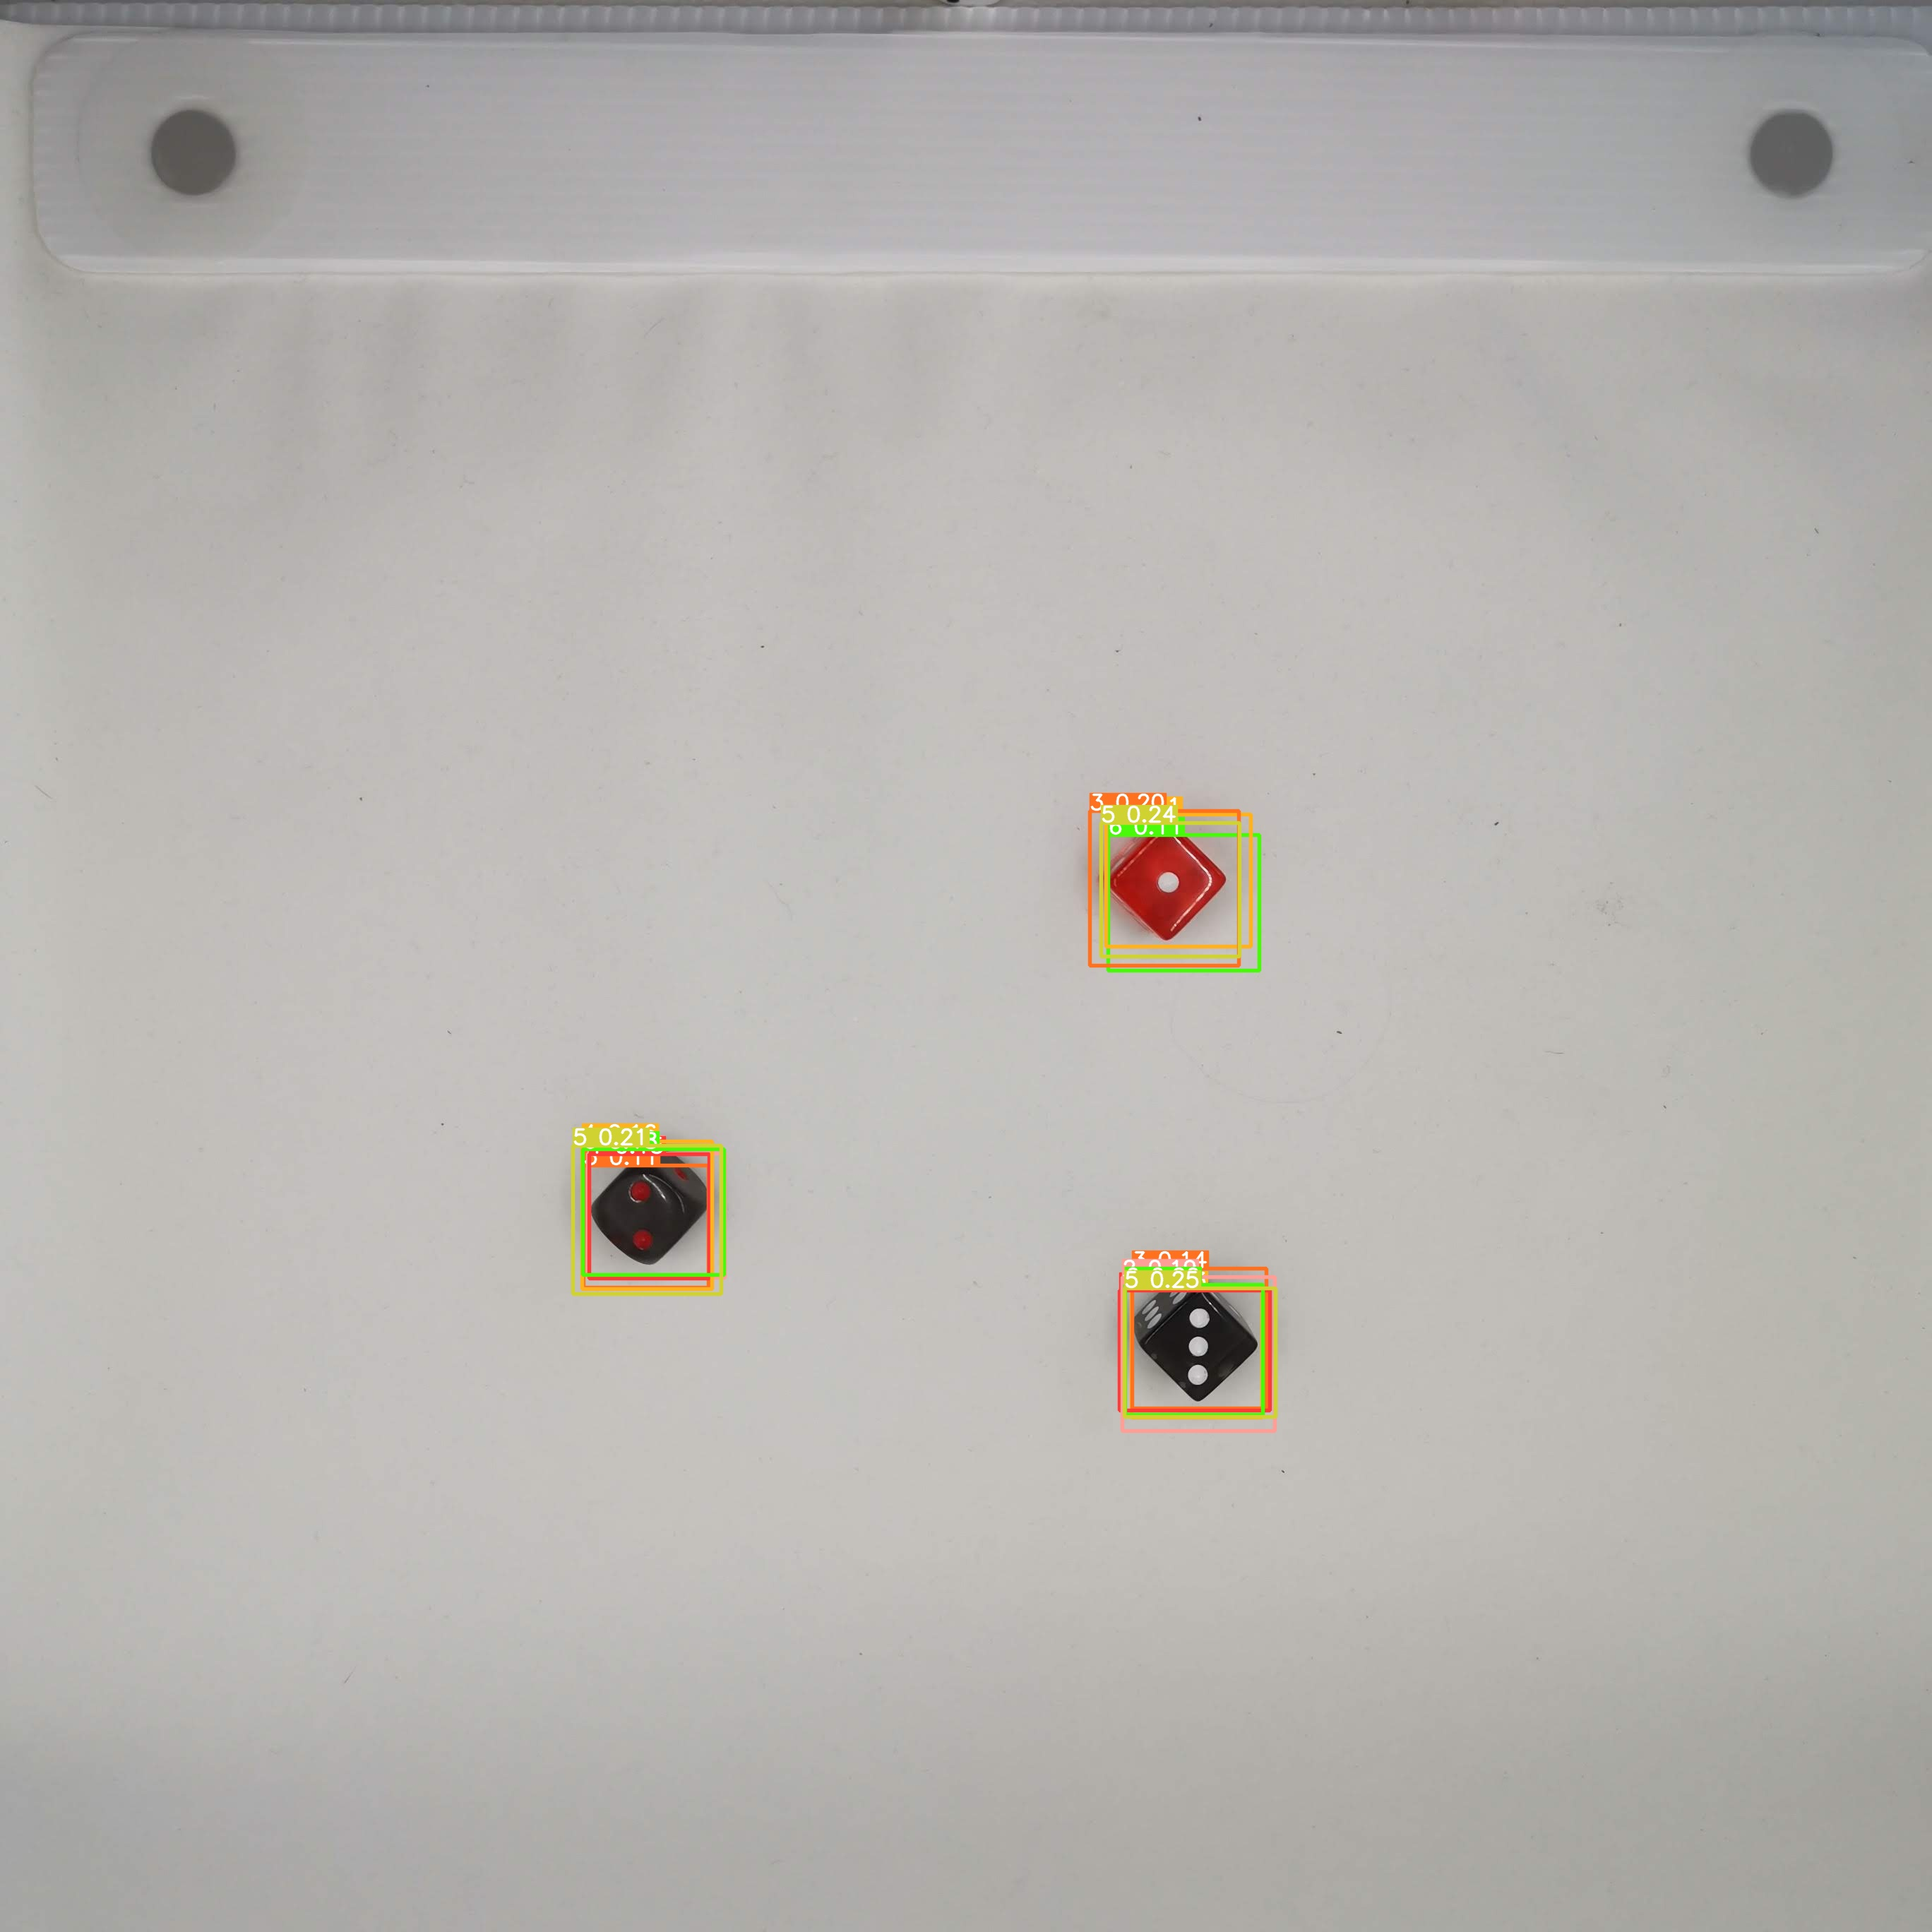

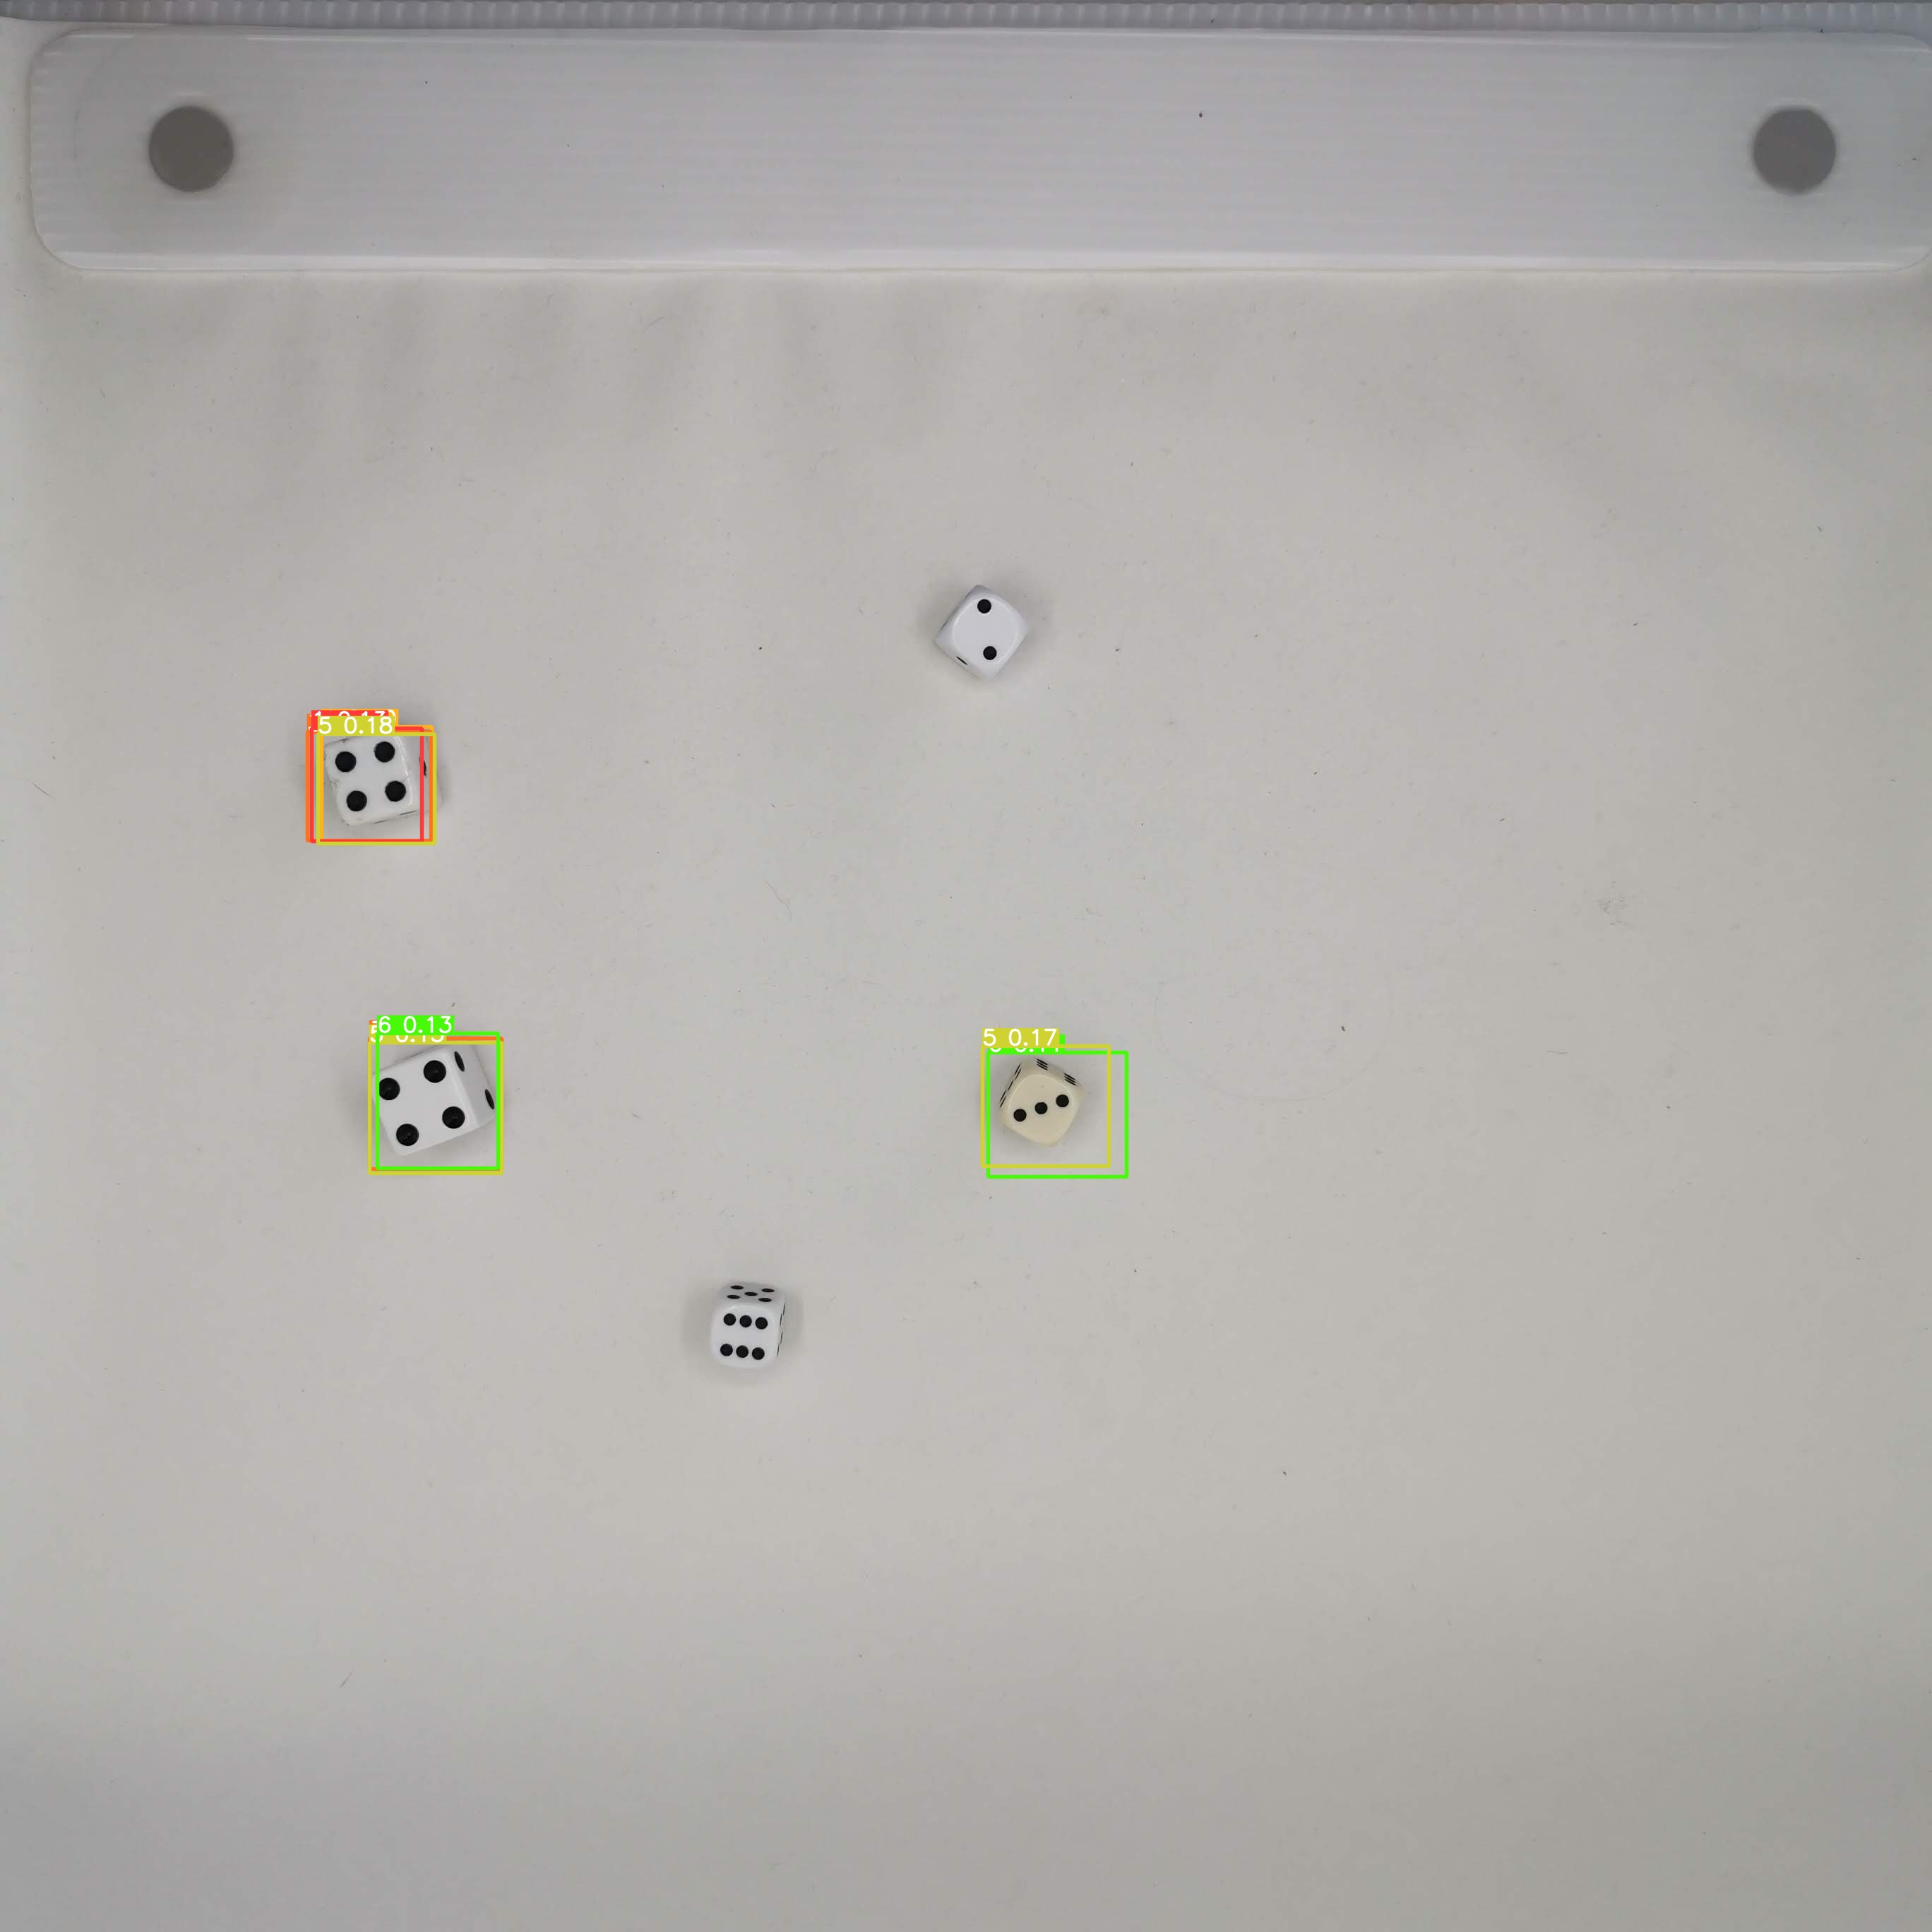

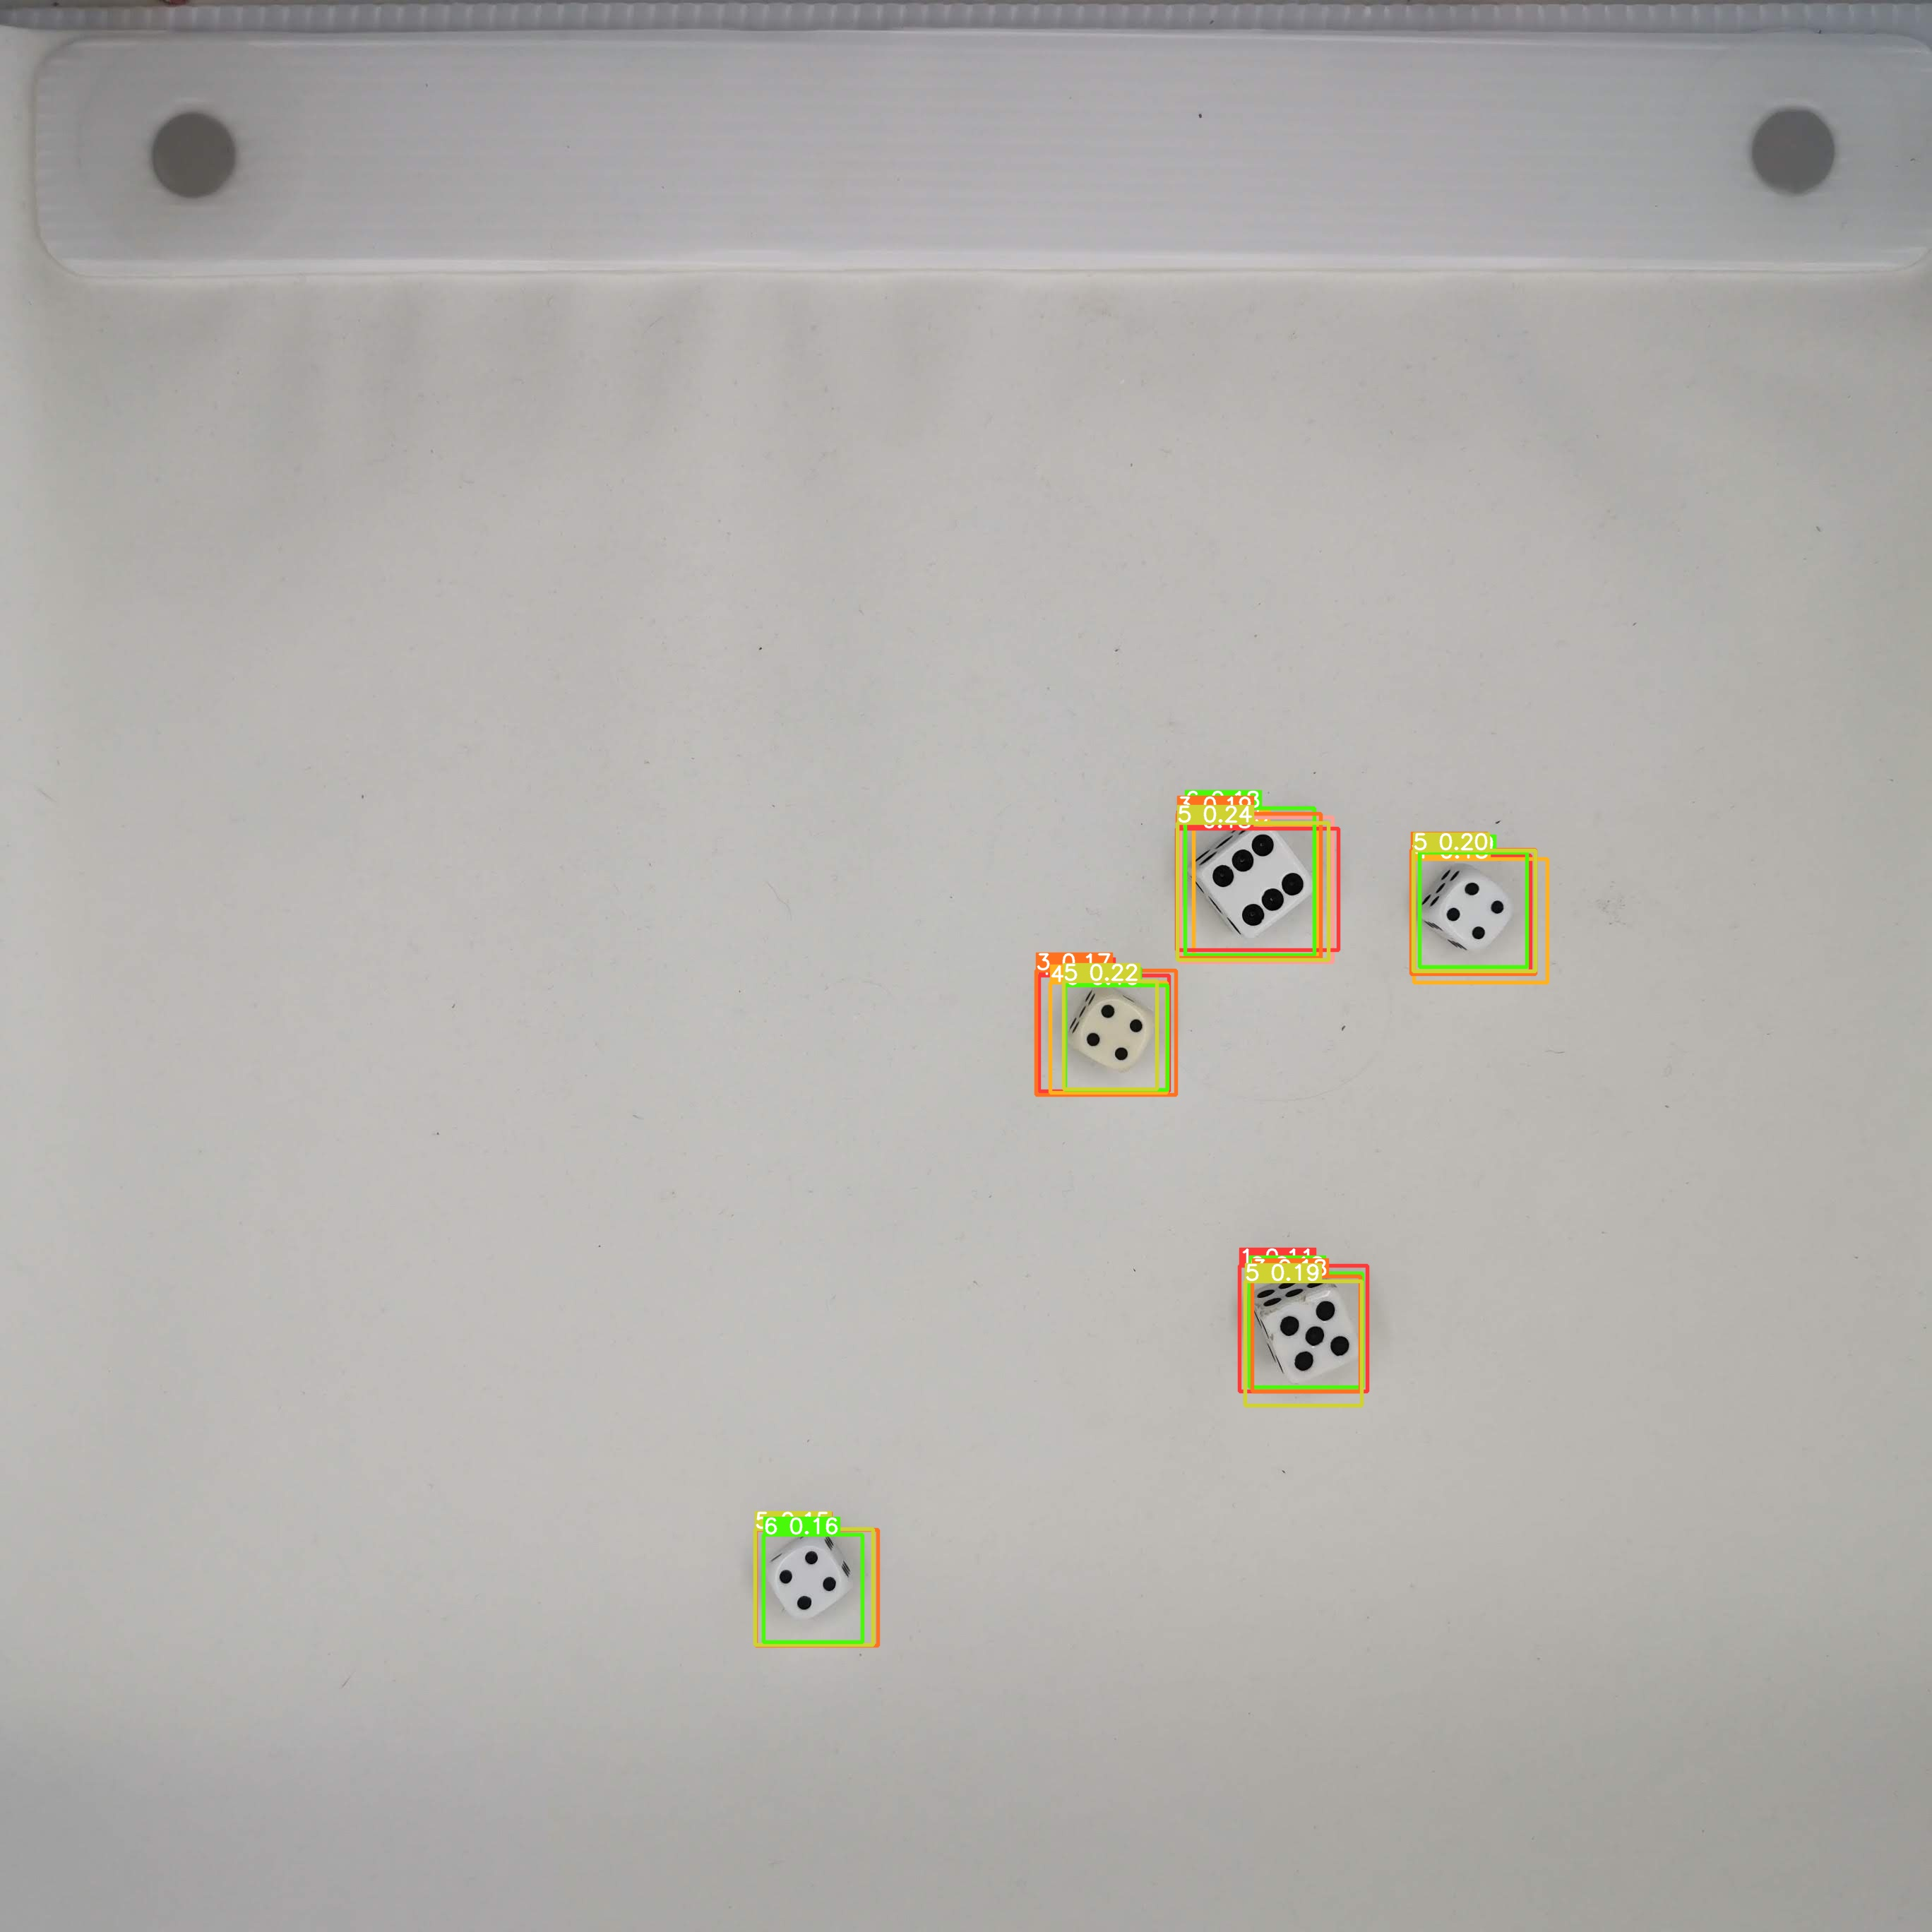

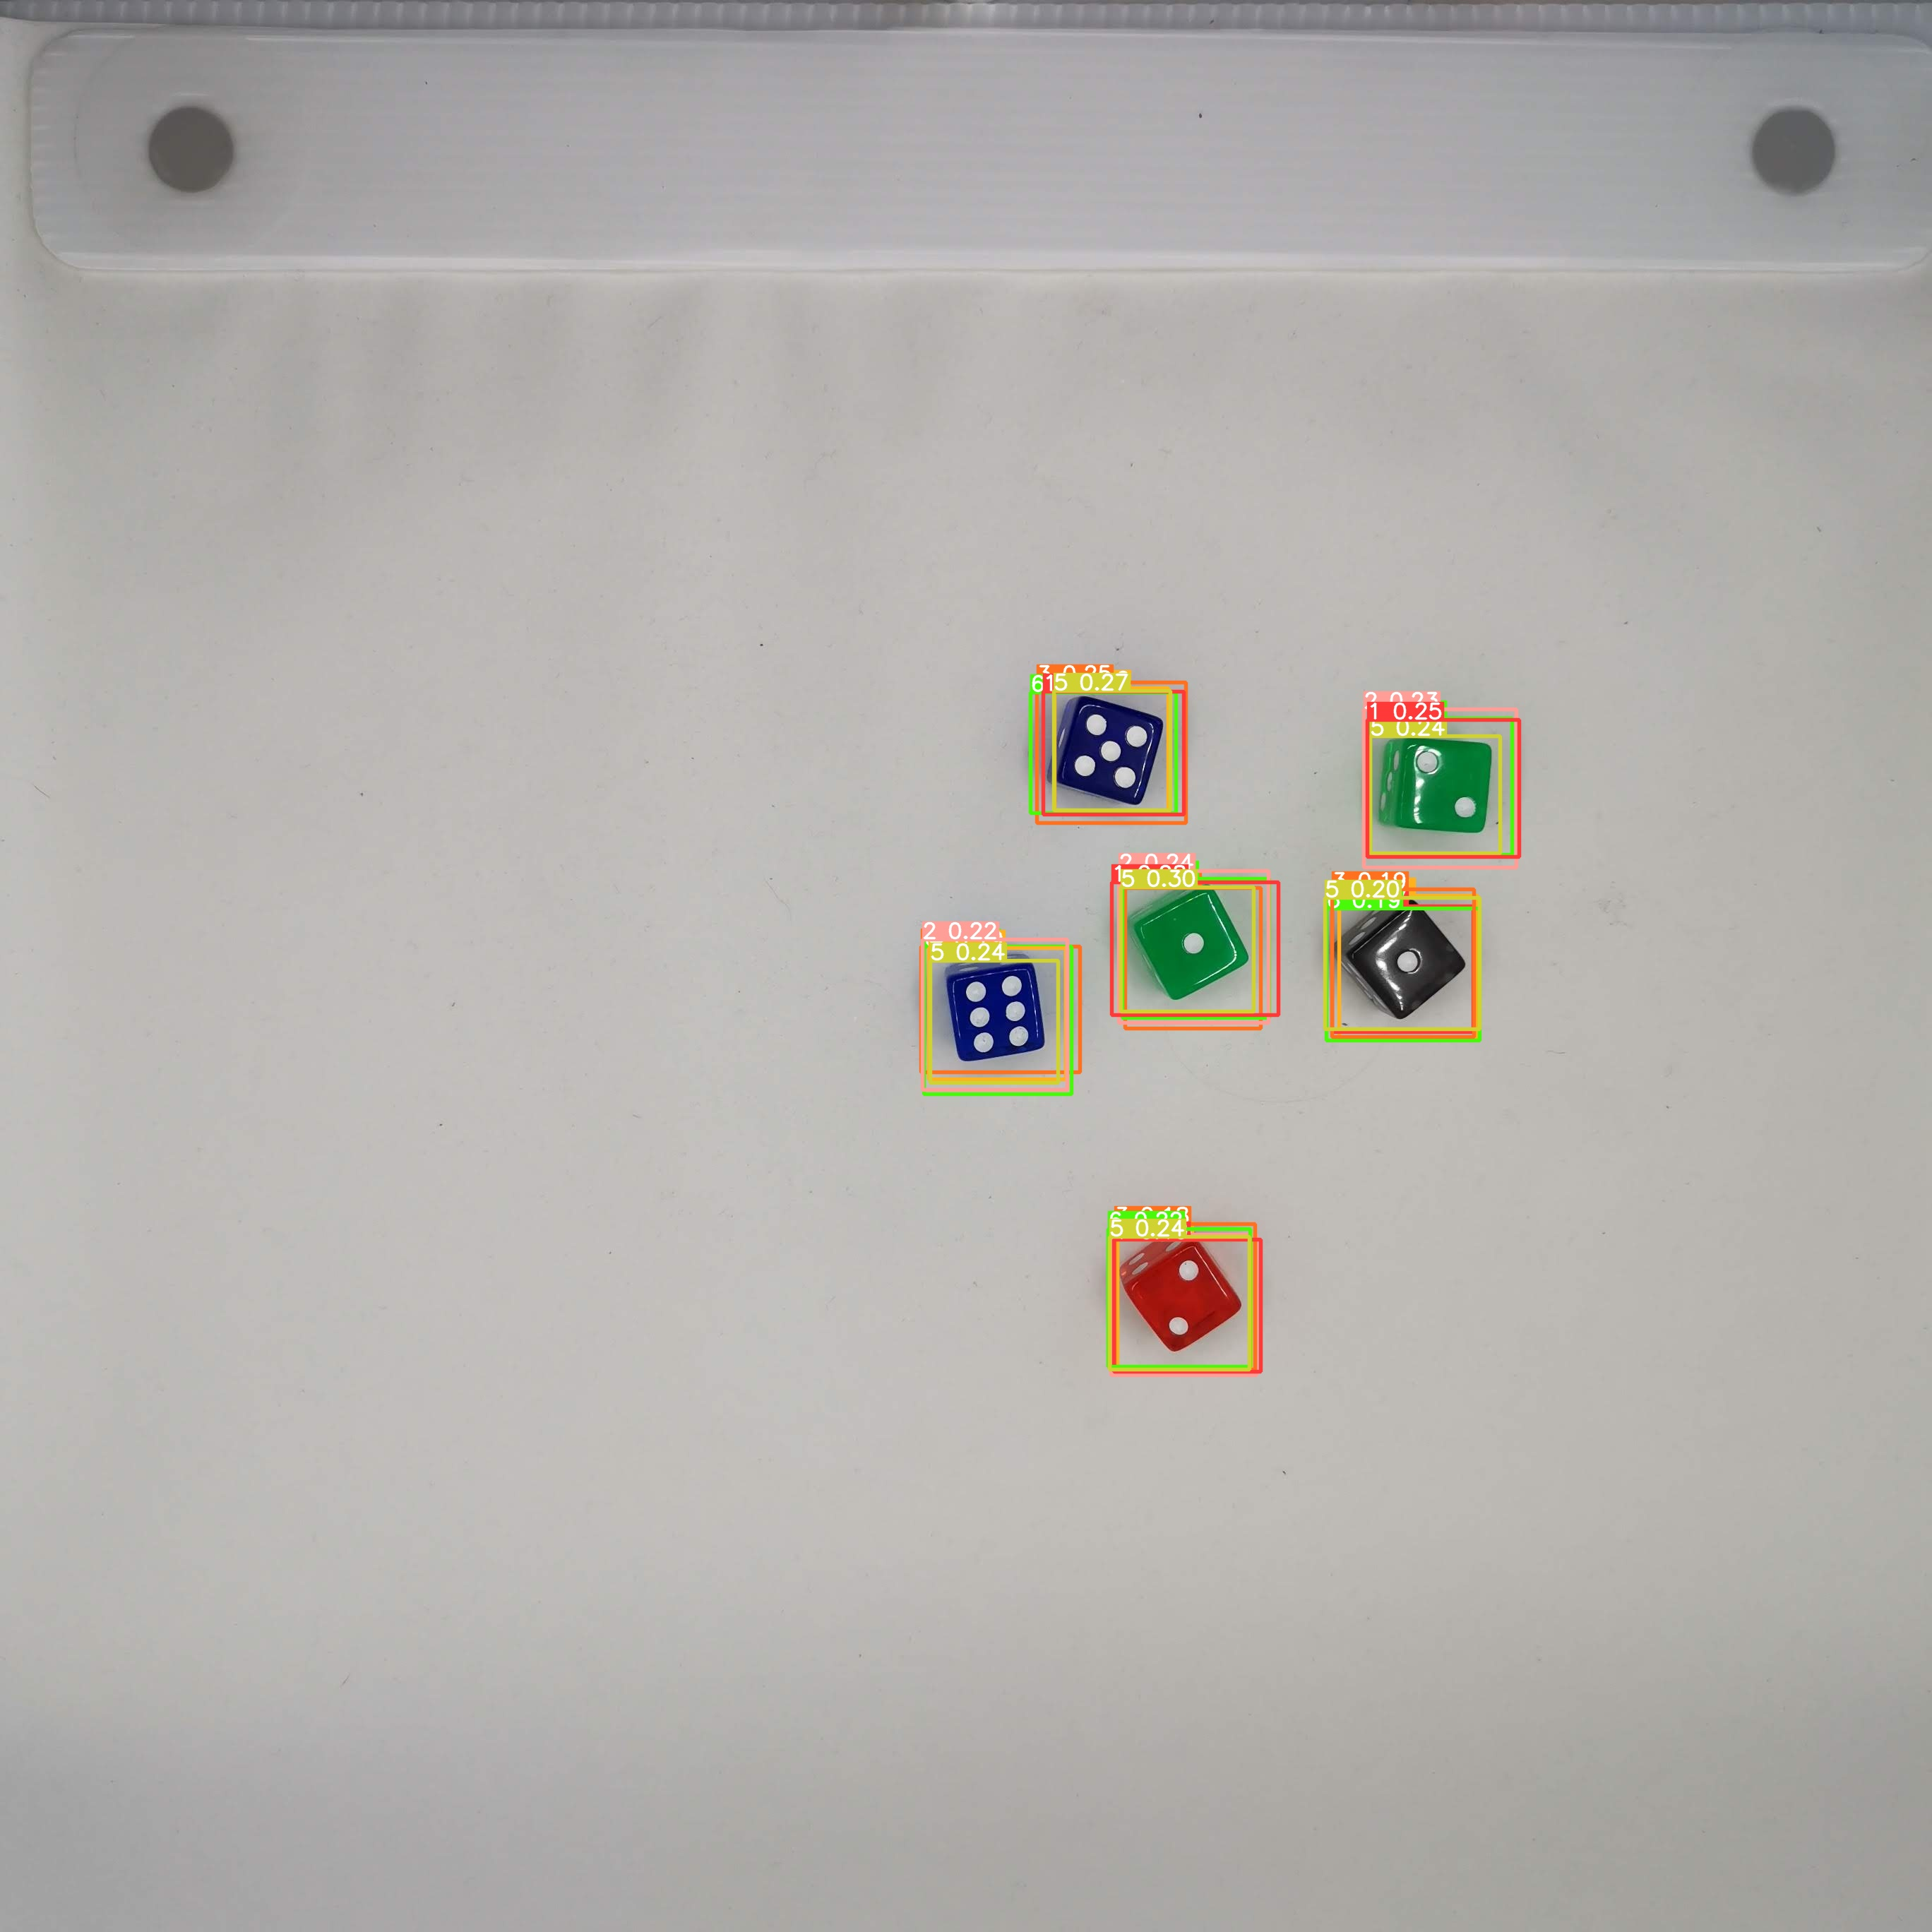

In [ ]:
import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/exp8/*.jpg'):
    display(Image(filename=imageName))
    print("\n")